In [42]:
import pandas as pd
import seaborn as sns
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [43]:

data = pd.read_csv("AAPL.csv",parse_dates=['Date'])
iphone_release_dates = pd.read_csv("iphone_release_date.csv")
mac_release_dates = pd.read_csv("Mac_release_date.csv")


<!-- # EDA -->

In [44]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-07-15,0.079799,0.081473,0.079241,0.079241,0.061240,77683200
1,1985-07-16,0.079241,0.079799,0.078125,0.078125,0.060378,143360000
2,1985-07-17,0.078683,0.079799,0.078683,0.078683,0.060809,118182400


In [45]:
data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
9762,2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300
9763,2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300
9764,2024-04-12,174.259995,178.360001,174.210007,176.550003,176.550003,101593300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9765 non-null   datetime64[ns]
 1   Open       9765 non-null   float64       
 2   High       9765 non-null   float64       
 3   Low        9765 non-null   float64       
 4   Close      9765 non-null   float64       
 5   Adj Close  9765 non-null   float64       
 6   Volume     9765 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 534.2 KB
None


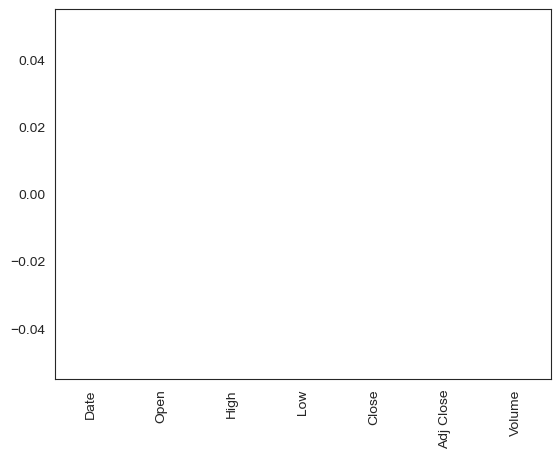

In [46]:
data.isnull().sum().plot(kind='bar')
print(data.info())

In [47]:
print(data.dtypes)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [48]:
print(data.shape)
data.nunique()

(9765, 7)


Date         9765
Open         6165
High         6112
Low          6099
Close        6280
Adj Close    7771
Volume       9369
dtype: int64

<!-- ## Analysis -->

<!-- ### تحليل العلاقات -->

 <!-- العلاقة بين سعر الفتح والإغلاق -->

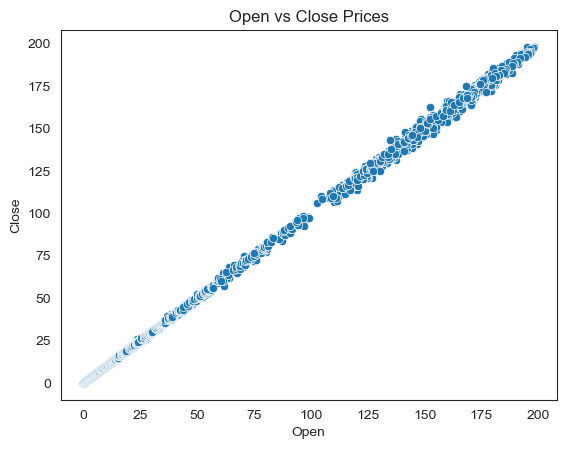

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data['Open'], y=data['Close'])
plt.title("Open vs Close Prices")
plt.show()


<!-- العلاقة بين السعر وحجم التداول -->

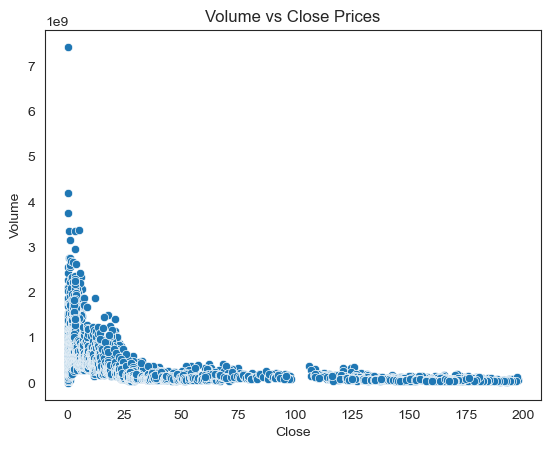

In [50]:
sns.scatterplot(x=data['Close'],y=data['Volume'])
plt.title("Volume vs Close Prices")
plt.show()

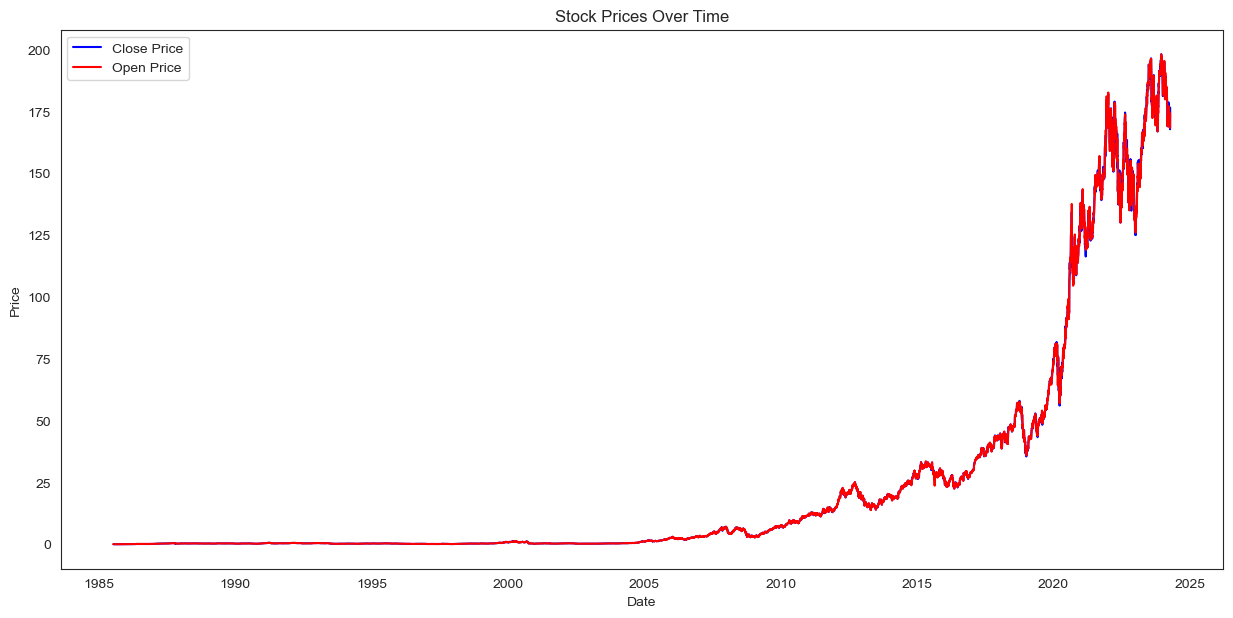

In [51]:
plt.figure(figsize=(15,7))
plt.plot(data['Date'], data['Close'], label="Close Price", color='blue')
plt.plot(data['Date'], data['Open'], label="Open Price", color='red')
plt.legend()
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


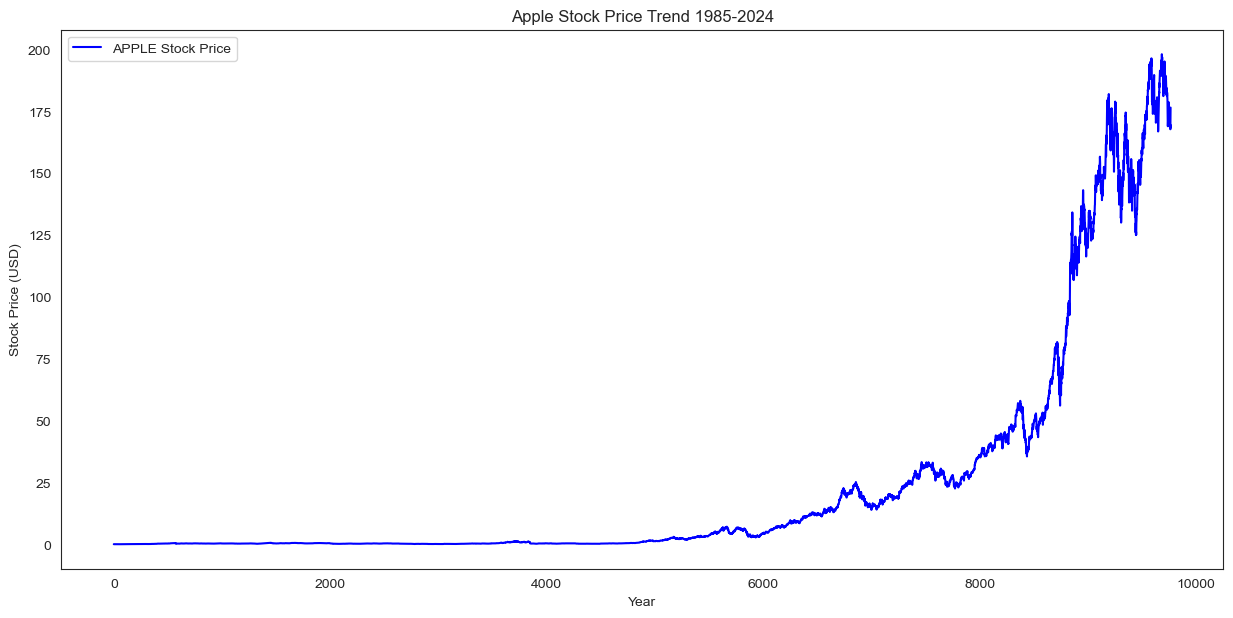

In [52]:
# Trend Analysis: Plotting stock prices over time
plt.figure(figsize=(15, 7))
plt.plot(data['Close'], label='APPLE Stock Price', color='blue')
plt.title('Apple Stock Price Trend 1985-2024')
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

<!-- المتوسطات المتحركة (Moving Averages)
للتخلص من الضوضاء وتحليل الاتجاهات: -->

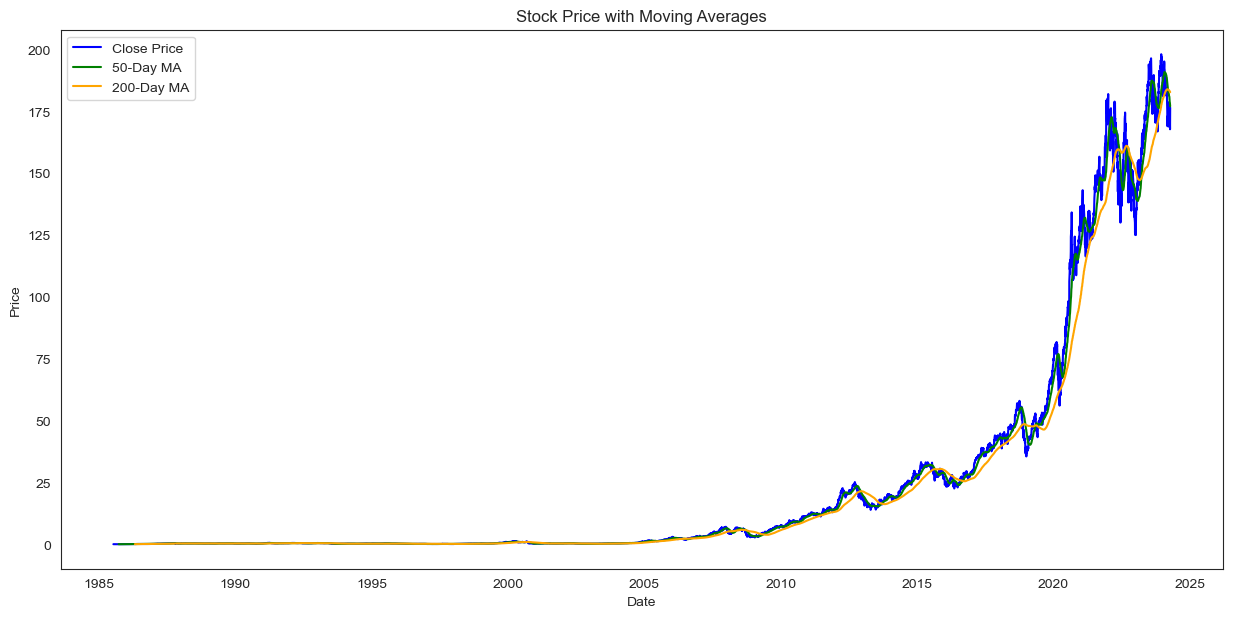

In [53]:
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(15,7))
plt.plot(data['Date'], data['Close'], label="Close Price", color='blue')
plt.plot(data['Date'], data['MA_50'], label="50-Day MA", color='green')
plt.plot(data['Date'], data['MA_200'], label="200-Day MA", color='orange')
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



C:\Users\MC\AppData\Local\Temp\ipykernel_13076\2709761995.py:7: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



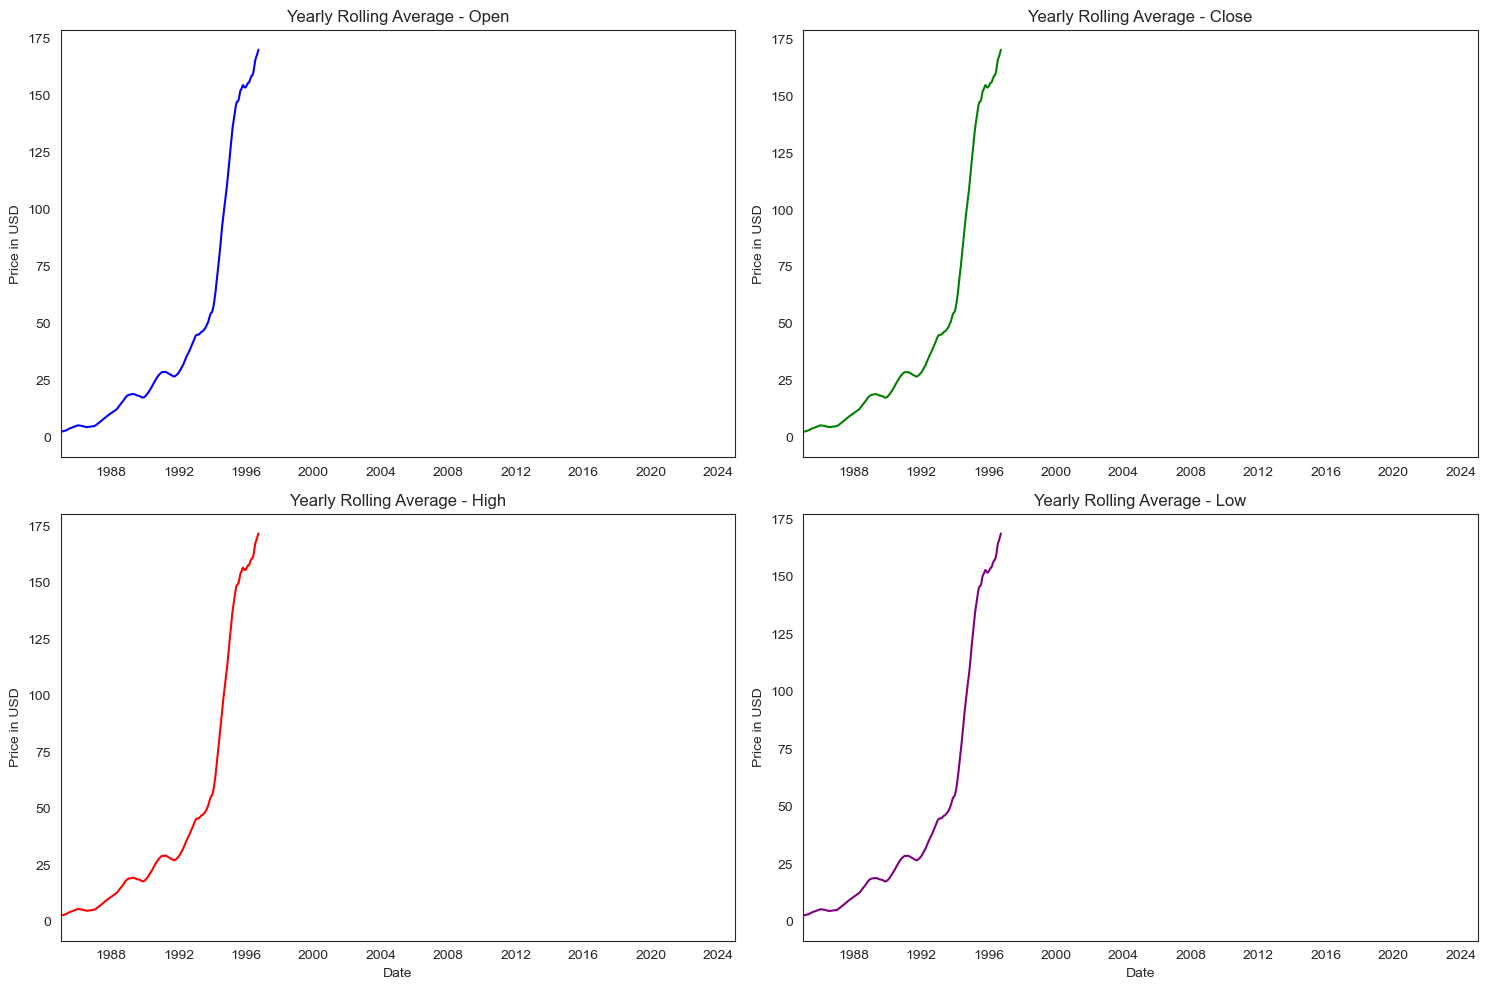

In [54]:
# Exploratory Data analysis (EDA)

# Define the rolling window period
rolling_window = 365

# Calculate the rolling averages
rolling_data = data.rolling(window=rolling_window, min_periods=1).mean()

# Create subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the full date range
start_date = pd.to_datetime("1985-01-01")
end_date = pd.to_datetime("2024-12-31")

# Plot each data series in a separate subplot and set x-axis limits
axs[0, 0].plot(rolling_data['Open'], color='blue')
axs[0, 0].set_title('Yearly Rolling Average - Open')
axs[0, 0].set_ylabel('Price in USD')
axs[0, 0].set_xlim(start_date, end_date)

axs[0, 1].plot(rolling_data['Close'], color='green')
axs[0, 1].set_title('Yearly Rolling Average - Close')
axs[0, 1].set_ylabel('Price in USD')
axs[0, 1].set_xlim(start_date, end_date)

axs[1, 0].plot(rolling_data['High'], color='red')
axs[1, 0].set_title('Yearly Rolling Average - High')
axs[1, 0].set_ylabel('Price in USD')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_xlim(start_date, end_date)

axs[1, 1].plot(rolling_data['Low'], color='purple')
axs[1, 1].set_title('Yearly Rolling Average - Low')
axs[1, 1].set_ylabel('Price in USD')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_xlim(start_date, end_date)

# Improve layout and spacing
plt.tight_layout()
plt.show()


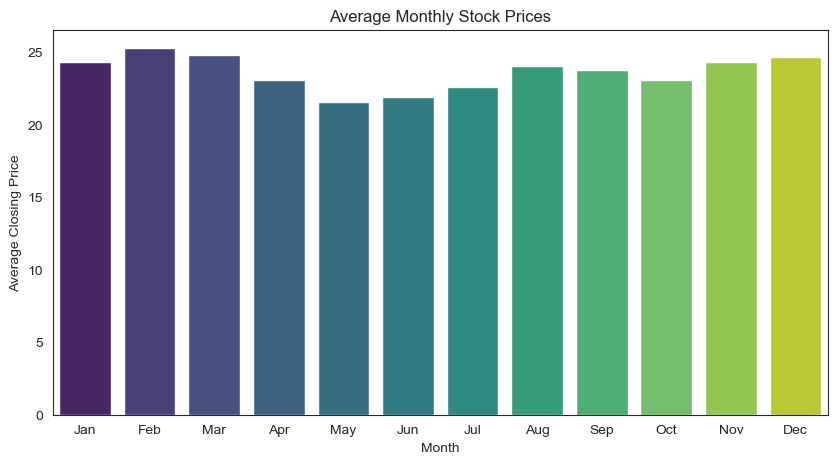

In [55]:
# Seasonality Check: Analyzing average stock prices by month
data.set_index('Date',inplace=True)
monthly_avg = data['Close'].groupby(data.index.month).mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average Monthly Stock Prices')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


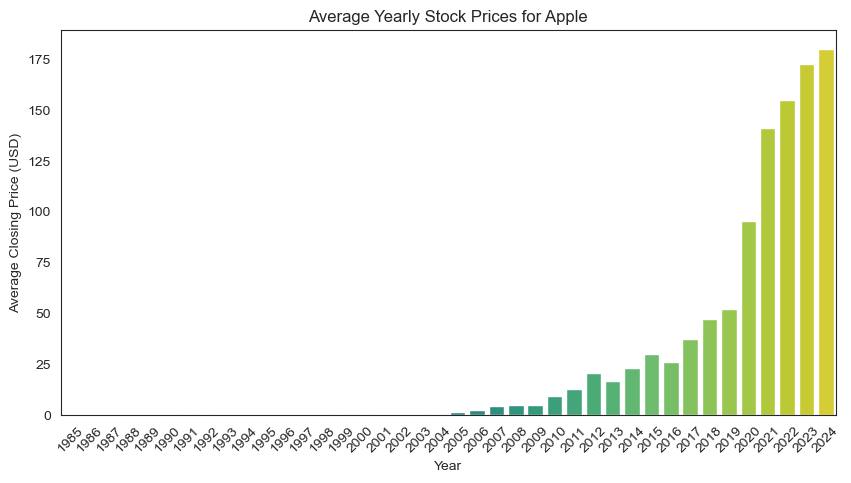

In [56]:

# Seasonality Check: Analyzing average stock prices by year
yearly_avg = data['Close'].resample('Y').mean()

# As the index is now a DateTimeIndex, convert it to just the year for plotting
yearly_avg.index = yearly_avg.index.year

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='viridis')
plt.title('Average Yearly Stock Prices for Apple')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


In [57]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Read the data files
data = pd.read_csv('AAPL.csv')
iphone_release_df = pd.read_csv('iphone_release_date.csv')

# Convert 'Date' columns to datetime
data['Date'] = pd.to_datetime(data['Date'])
iphone_release_df['Release Date'] = pd.to_datetime(iphone_release_df['Release Date'])

# Filter records from 2006 onwards
data = data[data['Date'].dt.year >= 2007]
iphone_release_df = iphone_release_df[iphone_release_df['Release Date'].dt.year >= 2006]

# Adjust iPhone model names by removing 'iPhone'
iphone_release_df['iPhone Model'] = iphone_release_df['iPhone Model'].str.replace('iPhone ', '')

# Create a trace for the stock data
stock_trace = go.Scatter(
    x=data['Date'],
    y=data['Close'],
    mode='lines',
    name='AAPL Stock Price'
)

# Create a trace for the iPhone release dates
release_trace = go.Scatter(
    x=iphone_release_df['Release Date'],
    y=[data.loc[data['Date'] == date, 'Close'].values[0] if date in data['Date'].values else None
       for date in iphone_release_df['Release Date']],
    mode='markers+text',
    name='iPhone Release',
    text=iphone_release_df['iPhone Model'],  # Updated to display modified model names
    textposition='top center',
    marker=dict(color='red', size=10)
)

# Combine all traces
fig = go.Figure(data=[stock_trace, release_trace])

# Update layout
fig.update_layout(
    title='Impact of iPhone Releases on AAPL Stock Price (from 2006)',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    hovermode='closest'
)

# Display the figure in the output cell of the notebook
iplot(fig)


In [58]:
# Load the data
macbook_release_df = pd.read_csv('Mac_release_date.csv')

# Convert 'Date' columns to datetime
macbook_release_df['Release Date'] = pd.to_datetime(macbook_release_df['Release Date'])

# Filter records from 1990 onwards
data = data[data['Date'].dt.year >= 1990]
macbook_release_df = macbook_release_df[macbook_release_df['Release Date'].dt.year >= 1990]

# Adjust MacBook model names by removing 'MacBook'
macbook_release_df['Model'] = macbook_release_df['Model'].str.replace('MacBook ', '')

# Create a trace for the stock data
# import plotly.graph_objs as go
stock_trace = go.Scatter(
    x=data['Date'],
    y=data['Close'],
    mode='lines',
    name='AAPL Stock Price'
)

# Create a trace for the MacBook release dates
release_trace = go.Scatter(
    x=macbook_release_df['Release Date'],
    y=[data.loc[data['Date'] == date, 'Close'].values[0] if date in data['Date'].values else None
       for date in macbook_release_df['Release Date']],
    mode='markers+text',
    name='MacBook Release',
    text=macbook_release_df['Model'],
    textposition='top center',
    marker=dict(color='red', size=10)
)

# Combine all traces
fig = go.Figure(data=[stock_trace, release_trace])

# Update layout
fig.update_layout(
    title='Impact of MacBook Releases on AAPL Stock Price (from 1990)',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    hovermode='closest'
)

# Display the figure in the output cell of the notebook
iplot(fig)

In [59]:
# # 
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller, kpss
# from statsmodels.tsa.seasonal import seasonal_decompose
# ############################


# # إضافة اختبار الاستقرارية ADF
# def adf_test(series):
#     result = adfuller(series.dropna())
#     print(f'ADF Statistic: {result[0]}')
#     print(f'p-value: {result[1]}')
#     print("Stationary" if result[1] < 0.05 else "Non-Stationary")
# ######################################3
# # إضافة اختبار الاستقرارية KPSS
# def kpss_test(series):
#     result = kpss(series.dropna(), regression='c', nlags='auto')
#     print(f'KPSS Statistic: {result[0]}')
#     print(f'p-value: {result[1]}')
#     print("Non-Stationary" if result[1] < 0.05 else "Stationary")

# # تطبيق الاختبارات على السلسلة الزمنية الأصلية
# print("ADF Test for Close Prices:")
# adf_test(data['Close'])
# print("KPSS Test for Close Prices:")
# kpss_test(data['Close'])


# # في حال عدم الاستقرارية، تطبيق التفاضل
# if adfuller(data['Close'].dropna())[1] > 0.05:
#     data['Close_diff'] = data['Close'].diff().dropna()
#     print("Applied Differencing to Make Data Stationary")
#     adf_test(data['Close_diff'])


# # تحليل الاتجاهات والموسمية
# result = seasonal_decompose(data['Close'], model='additive', period=30)
# result.plot()
# plt.show()
# ################################

# # تحليل التذبذب والتقلب
# plt.figure(figsize=(12, 5))
# plt.plot(data['Close'].rolling(window=30).std(), label='Rolling Std (30 days)')
# plt.title("Rolling Standard Deviation")
# plt.legend()
# plt.show()
# ###################

# plt.figure(figsize=(12, 5))
# plt.plot(data['Close'].pct_change(), label='Daily % Change')
# plt.title("Daily Percentage Change")
# plt.legend()
# plt.show()
# ###########################

# # إضافة رسوم بيانية تفاعلية
# fig = px.line(data, x=data.index, y='Close', title='Stock Price Over Time')
# fig.show()
# #############################
# # إضافة رسوم بيانية تفاعلية
# fig = px.line(data, x=data.index, y='Close', title='Stock Price Over Time')
# fig.show()


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


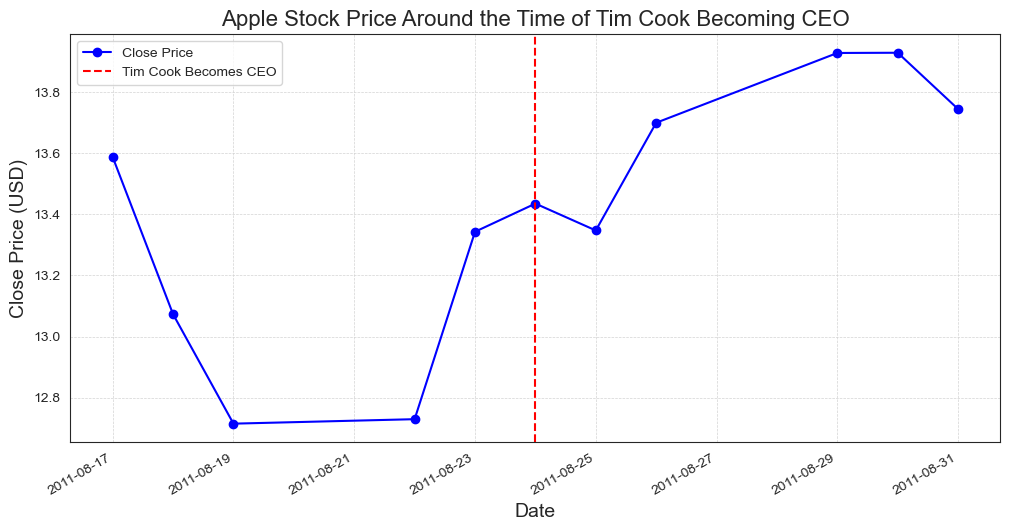

In [61]:

# Convert the 'Date' column to datetime
apple_stock_df =pd.read_csv("AAPL.csv")
apple_stock_df['Date'] = pd.to_datetime(apple_stock_df['Date'])

# Define the date of Tim Cook becoming CEO
cook_ceo_date = pd.Timestamp('2011-08-24')

# Filter the data for a range from 7 days before to 7 days after Tim Cook became CEO
extended_range_before_cook = cook_ceo_date - pd.Timedelta(days=7)
extended_range_after_cook = cook_ceo_date + pd.Timedelta(days=7)
date_mask_cook = (apple_stock_df['Date'] >= extended_range_before_cook) & (apple_stock_df['Date'] <= extended_range_after_cook)
filtered_data_cook = apple_stock_df[date_mask_cook]

# Calculate percentage change from start to end in the selected range
start_price_cook = filtered_data_cook['Close'].iloc[0]
end_price_cook = filtered_data_cook['Close'].iloc[-1]
percentage_change_cook = ((end_price_cook - start_price_cook) / start_price_cook) * 100

# Plotting the stock price around Tim Cook becoming CEO using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(filtered_data_cook['Date'], filtered_data_cook['Close'], marker='o', linestyle='-', color='blue', label='Close Price')
ax.axvline(x=cook_ceo_date, color='red', linestyle='--', label='Tim Cook Becomes CEO')

ax.set_title('Apple Stock Price Around the Time of Tim Cook Becoming CEO', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Close Price (USD)', fontsize=14)
ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
plt.show()

In [62]:
import plotly.graph_objects as go


apple_stock_df['Date'] = pd.to_datetime(apple_stock_df['Date'])


apple_stock_df.sort_values('Date', inplace=True)

# Define the date of Tim Cook becoming CEO
cook_ceo_date = pd.Timestamp('2011-08-24')

# Filter the data from the day Tim Cook became CEO to the latest available data
post_cook_data = apple_stock_df[apple_stock_df['Date'] >= cook_ceo_date]

# Calculate cumulative return
post_cook_data['Cumulative Return'] = post_cook_data['Adj Close'] / post_cook_data['Adj Close'].iloc[0]

# Calculate annualized return
years_since_ceo = (post_cook_data['Date'].iloc[-1] - cook_ceo_date).days / 365.25
annualized_return = (post_cook_data['Cumulative Return'].iloc[-1] ** (1 / years_since_ceo) - 1) * 100

# Plotting the cumulative return using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=post_cook_data['Date'], y=post_cook_data['Cumulative Return'],
                         mode='lines+markers',
                         name='Cumulative Return',
                         line=dict(color='blue')))

fig.update_layout(title='Cumulative Return of Apple Stock Since Tim Cook Became CEO',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Return',
                  legend_title='Legend',
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'))

# Annotation at the beginning and the end
fig.add_annotation(x=cook_ceo_date, y=1, text="CEO Start",
                   showarrow=True, arrowhead=1, ax=20, ay=-30)

fig.add_annotation(x=post_cook_data['Date'].iloc[-1], y=post_cook_data['Cumulative Return'].iloc[-1],
                   text=f"Latest: {post_cook_data['Cumulative Return'].iloc[-1]*100:.2f}% Change<br>Annualized: {annualized_return:.2f}%",
                   showarrow=True, arrowhead=1, ax=-20, ay=30)

# Show plot
fig.show()


C:\Users\MC\AppData\Local\Temp\ipykernel_13076\1131414720.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



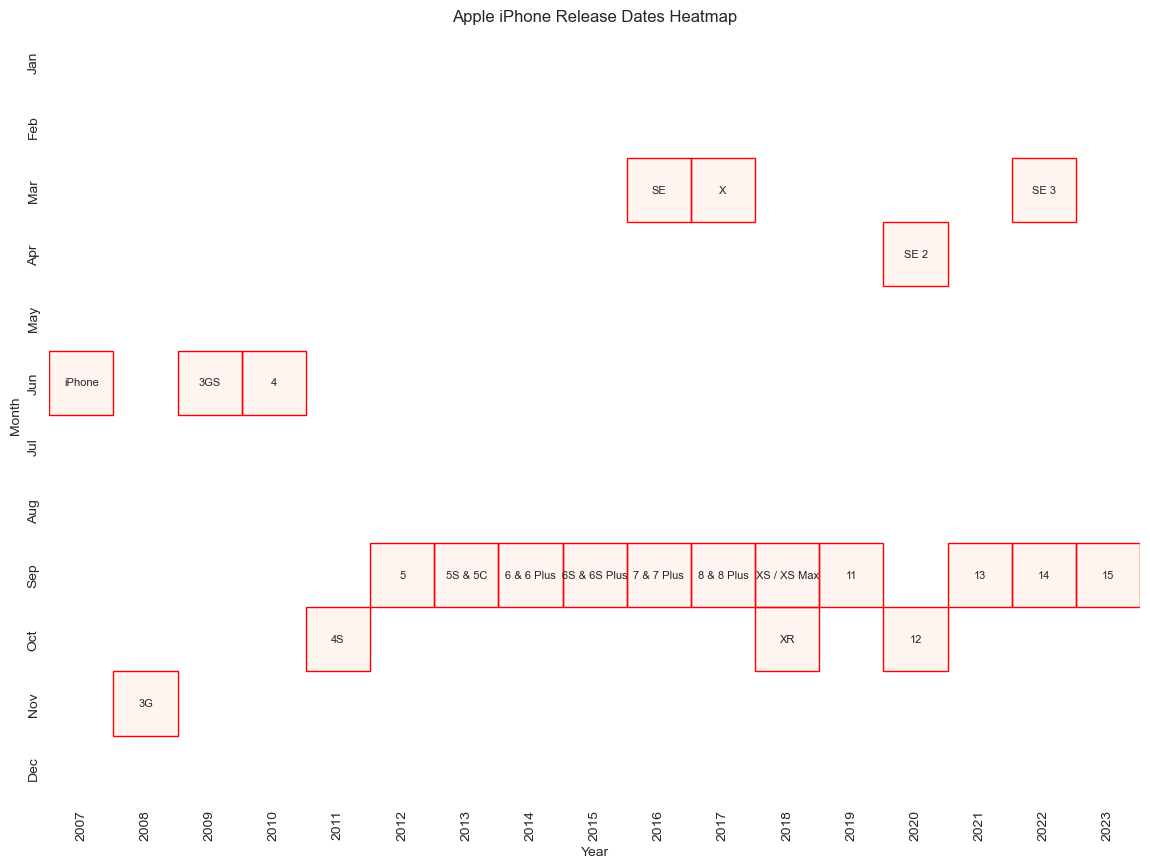

In [63]:

from matplotlib.patches import Rectangle

# Load the data
apple_stock_data = pd.read_csv("AAPL.csv")
release_dates = pd.read_csv("iphone_release_date.csv")

# Ensure dates are in datetime format
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])
release_dates['Release Date'] = pd.to_datetime(release_dates['Release Date'])

# Adjust iPhone model names by removing 'iPhone'
release_dates['iPhone Model'] = release_dates['iPhone Model'].str.replace('iPhone ', '')

# Create a DataFrame for all months and years in the dataset
start_year = release_dates['Release Date'].dt.year.min()
end_year = release_dates['Release Date'].dt.year.max()

# Create the base figure
plt.figure(figsize=(15, 10))
ax = plt.gca()
sns.set_style('white')

# Create a matrix to represent the calendar heatmap
calendar_heatmap = np.zeros((12, end_year - start_year + 1))

# Set the entire matrix to NaN so that non-release months are not colored
calendar_heatmap[:, :] = np.nan

# Populate the heatmap matrix with release dates
for _, row in release_dates.iterrows():
    year = row['Release Date'].year - start_year
    month = row['Release Date'].month - 1
    calendar_heatmap[month, year] = 1  # Mark the release date

# Plot the heatmap
sns.heatmap(calendar_heatmap, cmap="Reds", linewidths=.5, ax=ax, cbar=False, mask=np.isnan(calendar_heatmap))

# Add a rectangle and label for each release
for _, row in release_dates.iterrows():
    year = row['Release Date'].year - start_year
    month = row['Release Date'].month - 1
    model_name = row['iPhone Model']
    # Add rectangle
    rect = Rectangle((year, month), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    # Add model name
    plt.text(year + 0.5, month + 0.5, model_name, ha='center', va='center', fontsize=8)

# Adjust the y-axis to show month names
ax.set_yticks(np.arange(12) + 0.5)
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust the x-axis to show year
ax.set_xticks(np.arange(end_year - start_year + 1) + 0.5)
ax.set_xticklabels(range(start_year, end_year + 1), rotation=90)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Apple iPhone Release Dates Heatmap')

plt.show()


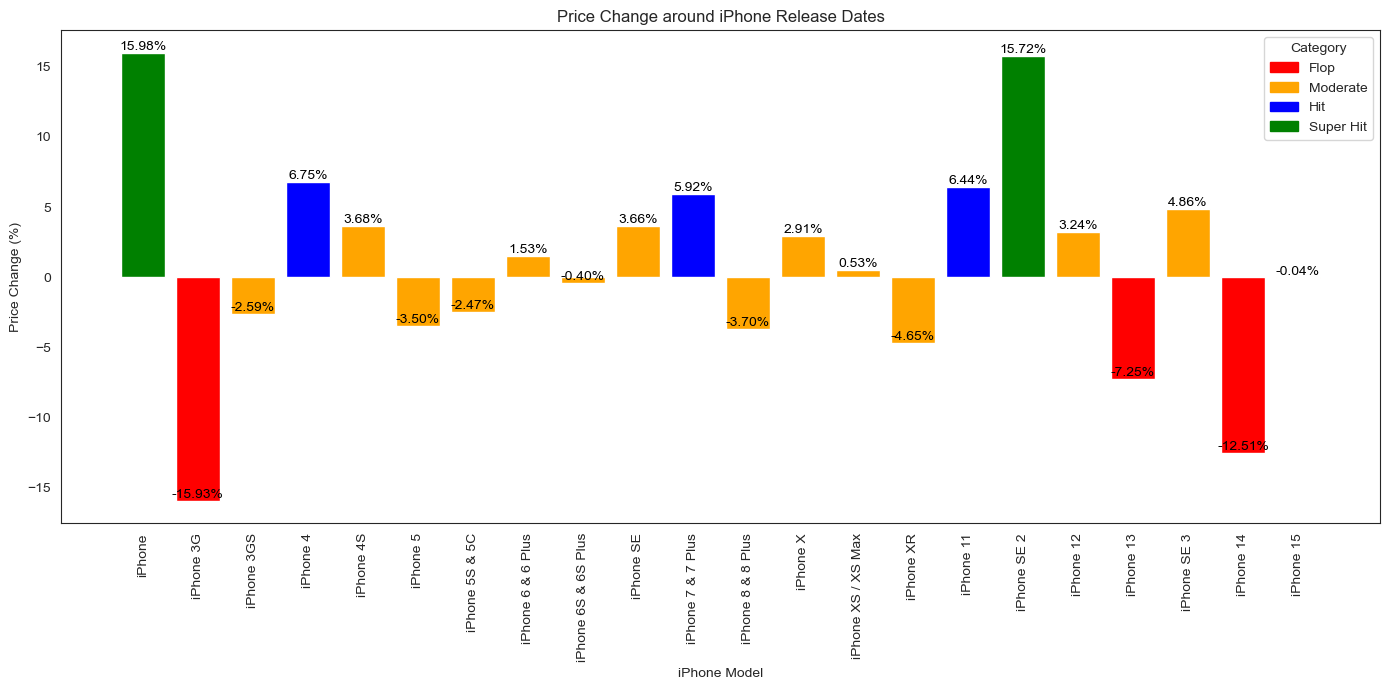

In [94]:
# Ensure dates are in datetime format
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])
release_dates['Release Date'] = pd.to_datetime(release_dates['Release Date'])

window = 15  # Set the window to 15 days before and after

models = []
price_changes = []
categories = []

# Define category colors and thresholds
category_colors = {
    'Flop': 'red',
    'Moderate': 'orange',
    'Hit': 'blue',
    'Super Hit': 'green'
}

# Function to determine category based on price change
def get_category(change):
    if change < -5:
        return 'Flop'
    elif -5 <= change <= 5:
        return 'Moderate'
    elif 5 < change <= 10:
        return 'Hit'
    else:
        return 'Super Hit'

# Analyze stock data around each iPhone release date
for index, release in release_dates.iterrows():
    release_date = release['Release Date']
    model_name = release['iPhone Model']

    start_date = release_date - pd.Timedelta(days=window)
    end_date = release_date + pd.Timedelta(days=window)

    mask = (apple_stock_data['Date'] >= start_date) & (apple_stock_data['Date'] <= end_date)
    data_window = apple_stock_data[mask]

    if not data_window.empty:
        start_price = data_window.iloc[0]['Close']
        end_price = data_window.iloc[-1]['Close']
        price_change = ((end_price - start_price) / start_price) * 100

        models.append(model_name)
        price_changes.append(price_change)
        categories.append(get_category(price_change))

# Create a DataFrame to display the results
analysis_results = pd.DataFrame({
    'Model': models,
    'Price Change (%)': price_changes,
    'Category': categories
})

# Plot the results
plt.figure(figsize=(14, 7))
colors = [category_colors[category] for category in categories]
bar_plot = plt.bar(range(len(price_changes)), price_changes, color=colors)
plt.xlabel('iPhone Model')
plt.ylabel('Price Change (%)')
plt.title('Price Change around iPhone Release Dates')
plt.xticks(range(len(price_changes)), analysis_results['Model'], rotation=90)

# Annotate each bar with the value
for bar, value in zip(bar_plot, price_changes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{value:.2f}%", ha='center', va='bottom', color='black')

# Create legend from category colors
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=label) for label, color in category_colors.items()]
plt.legend(handles=legend_handles, title="Category")

plt.tight_layout()
plt.show()


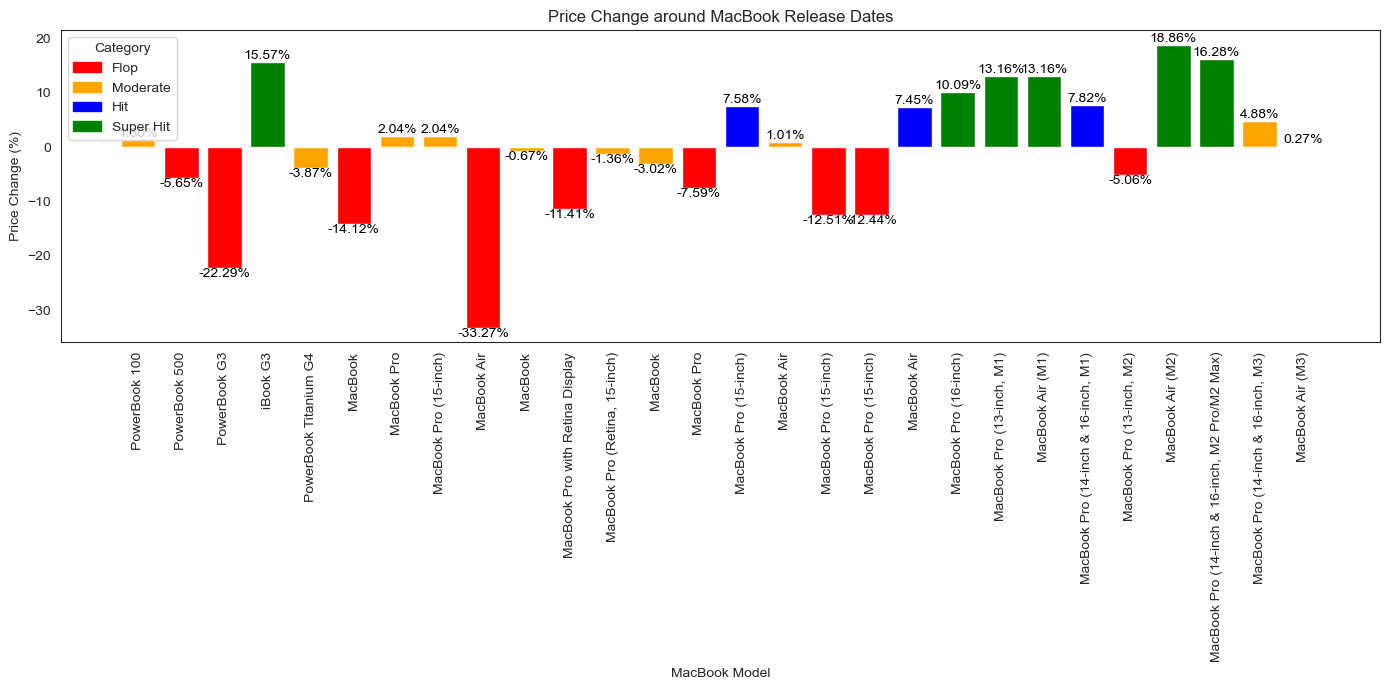

In [65]:
# Load the data
apple_stock_data = pd.read_csv("AAPL.csv")
release_dates = pd.read_csv("iphone_release_date.csv")
macbook_release_dates = pd.read_csv('Mac_release_date.csv')



# Ensure dates are in datetime format
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])
macbook_release_dates['Release Date'] = pd.to_datetime(macbook_release_dates['Release Date'])

# Sort MacBook release dates from earliest to latest
macbook_release_dates = macbook_release_dates.sort_values(by='Release Date')

window = 15  # Set the window to 15 days before and after

models = []
price_changes = []
categories = []

# Define category colors and thresholds
category_colors = {
    'Flop': 'red',
    'Moderate': 'orange',
    'Hit': 'blue',
    'Super Hit': 'green'
}

# Function to determine category
def get_category(change):
    if change < -5:
        return 'Flop'
    elif -5 <= change <= 5:
        return 'Moderate'
    elif 5 < change <= 10:
        return 'Hit'
    else:
        return 'Super Hit'

# Analyze stock data around each MacBook release date
for index, release in macbook_release_dates.iterrows():
    release_date = release['Release Date']
    model_name = release['Model']

    start_date = release_date - pd.Timedelta(days=window)
    end_date = release_date + pd.Timedelta(days=window)

    mask = (apple_stock_data['Date'] >= start_date) & (apple_stock_data['Date'] <= end_date)
    data_window = apple_stock_data[mask]

    if not data_window.empty:
        start_price = data_window.iloc[0]['Close']
        end_price = data_window.iloc[-1]['Close']
        price_change = ((end_price - start_price) / start_price) * 100

        models.append(model_name)
        price_changes.append(price_change)
        categories.append(get_category(price_change))

# Create a DataFrame to display the results
analysis_results = pd.DataFrame({
    'Model': models,
    'Price Change (%)': price_changes,
    'Category': categories
})

# Plot the results
plt.figure(figsize=(14, 7))
colors = [category_colors[category] for category in categories]
bar_plot = plt.bar(range(len(price_changes)), price_changes, color=colors)
plt.xlabel('MacBook Model')
plt.ylabel('Price Change (%)')
plt.title('Price Change around MacBook Release Dates')
plt.xticks(range(len(price_changes)), analysis_results['Model'], rotation=90)

# Create legend handles manually
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=label) for label, color in category_colors.items()]
plt.legend(handles=legend_handles, title="Category")

# Annotate each bar with the value
for bar, value in zip(bar_plot, price_changes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{value:.2f}%", ha='center', va='bottom' if value > 0 else 'top', color='black')

plt.tight_layout()
plt.show()


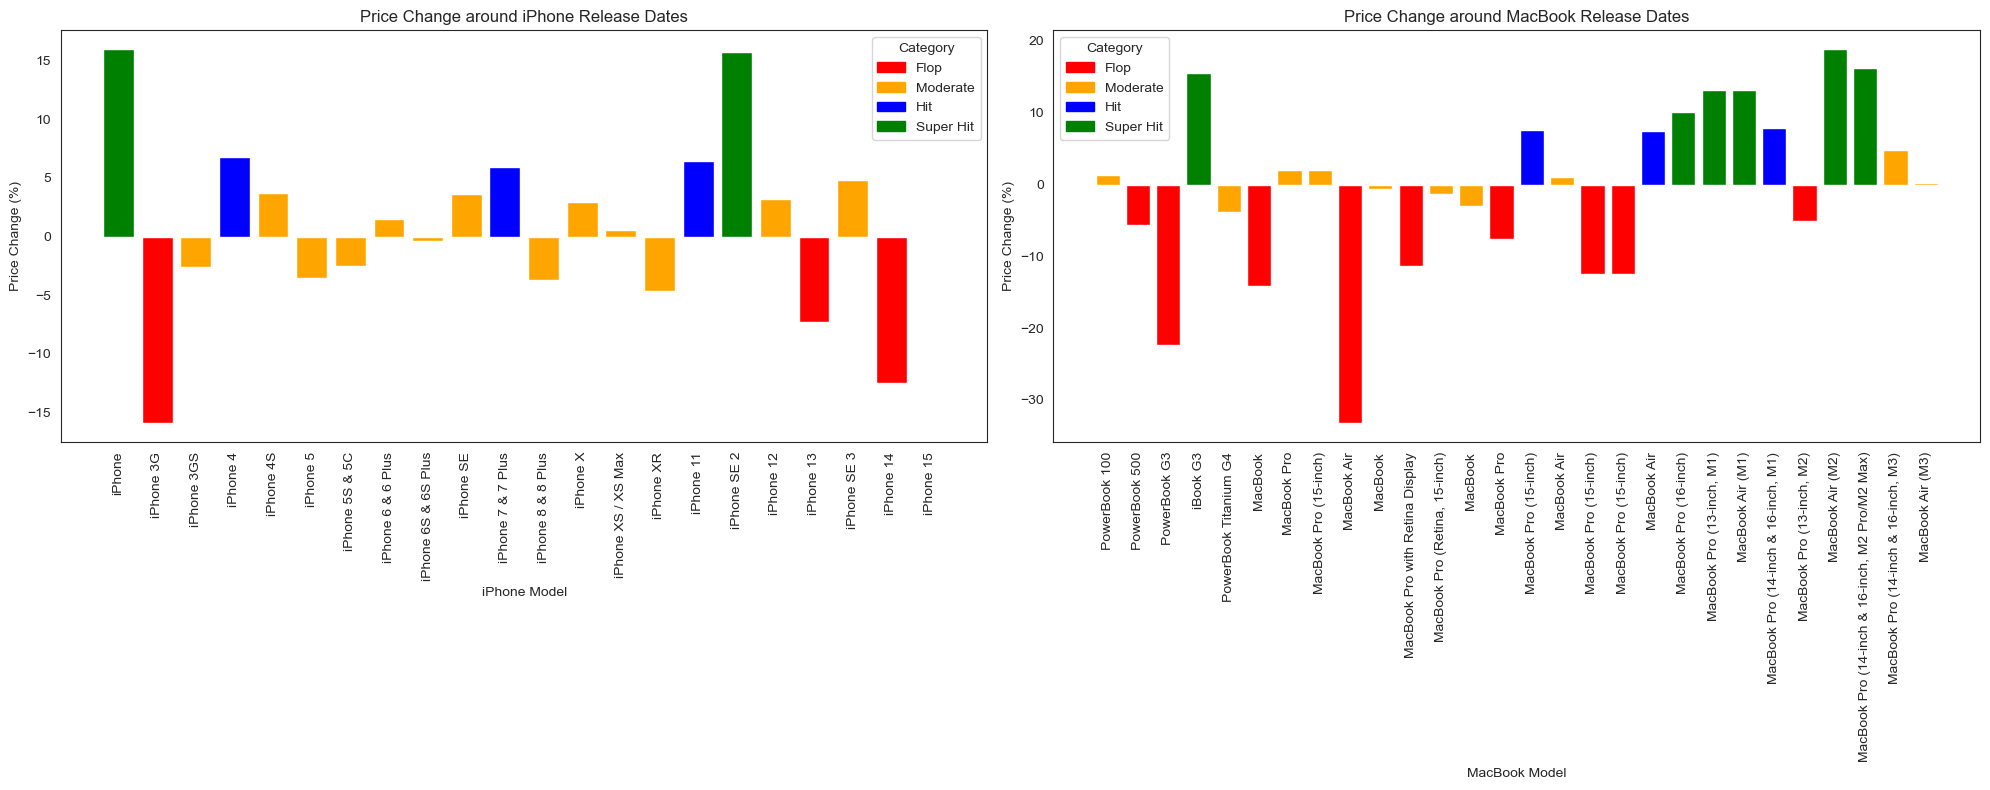

In [66]:
from matplotlib.patches import Patch

apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])
iphone_release_dates['Release Date'] = pd.to_datetime(iphone_release_dates['Release Date'])
macbook_release_dates['Release Date'] = pd.to_datetime(macbook_release_dates['Release Date'])

# Sort release dates
macbook_release_dates = macbook_release_dates.sort_values(by='Release Date')

window = 15  # Set the window to 15 days before and after
category_colors = {
    'Flop': 'red',
    'Moderate': 'orange',
    'Hit': 'blue',
    'Super Hit': 'green'
}

def get_category(change):
    if change < -5:
        return 'Flop'
    elif -5 <= change <= 5:
        return 'Moderate'
    elif 5 < change <= 10:
        return 'Hit'
    else:
        return 'Super Hit'

def analyze_stock_changes(release_dates, model_column):
    models = []
    price_changes = []
    categories = []
    for index, release in release_dates.iterrows():
        release_date = release['Release Date']
        model_name = release[model_column]
        start_date = release_date - pd.Timedelta(days=window)
        end_date = release_date + pd.Timedelta(days=window)
        mask = (apple_stock_data['Date'] >= start_date) & (apple_stock_data['Date'] <= end_date)
        data_window = apple_stock_data[mask]
        if not data_window.empty:
            start_price = data_window.iloc[0]['Close']
            end_price = data_window.iloc[-1]['Close']
            price_change = ((end_price - start_price) / start_price) * 100
            models.append(model_name)
            price_changes.append(price_change)
            categories.append(get_category(price_change))
    return models, price_changes, categories

# Analyze iPhone and MacBook release data
iphone_models, iphone_changes, iphone_categories = analyze_stock_changes(iphone_release_dates, 'iPhone Model')
macbook_models, macbook_changes, macbook_categories = analyze_stock_changes(macbook_release_dates, 'Model')

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
colors_iphone = [category_colors[category] for category in iphone_categories]
colors_macbook = [category_colors[category] for category in macbook_categories]

ax1.bar(range(len(iphone_changes)), iphone_changes, color=colors_iphone)
ax1.set_xlabel('iPhone Model')
ax1.set_ylabel('Price Change (%)')
ax1.set_title('Price Change around iPhone Release Dates')
ax1.set_xticks(range(len(iphone_models)))
ax1.set_xticklabels(iphone_models, rotation=90)

ax2.bar(range(len(macbook_changes)), macbook_changes, color=colors_macbook)
ax2.set_xlabel('MacBook Model')
ax2.set_ylabel('Price Change (%)')
ax2.set_title('Price Change around MacBook Release Dates')
ax2.set_xticks(range(len(macbook_models)))
ax2.set_xticklabels(macbook_models, rotation=90)

# Create legend handles manually for each subplot
legend_handles = [Patch(color=color, label=label) for label, color in category_colors.items()]
ax1.legend(handles=legend_handles, title="Category")
ax2.legend(handles=legend_handles, title="Category")

plt.tight_layout()
plt.show()



## EDA During COVID

In [67]:
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [69]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
data = pd.read_csv("AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Define the periods

before_covid_start = pd.Timestamp('2017-01-01')
before_covid_end = pd.Timestamp('2018-12-31')
after_covid_start = pd.Timestamp('2022-01-01')
after_covid_end = pd.Timestamp('2023-12-31')

# Filter the data for these periods
before_covid_data = data[(data['Date'] >= before_covid_start) & (data['Date'] <= before_covid_end)]
after_covid_data = data[(data['Date'] >= after_covid_start) & (data['Date'] <= after_covid_end)]

# Calculate the percentage change
before_covid_change = ((before_covid_data['Adj Close'].iloc[-1] - before_covid_data['Adj Close'].iloc[0]) / before_covid_data['Adj Close'].iloc[0]) * 100
after_covid_change = ((after_covid_data['Adj Close'].iloc[-1] - after_covid_data['Adj Close'].iloc[0]) / after_covid_data['Adj Close'].iloc[0]) * 100

# Create graph
fig = go.Figure()

# Adding the line plots
fig.add_trace(go.Scatter(x=before_covid_data['Date'], y=before_covid_data['Adj Close'],
                         mode='lines+markers', name='2017-2018 (Before COVID-19)',
                         marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=after_covid_data['Date'], y=after_covid_data['Adj Close'],
                         mode='lines+markers', name='2022-2023 (After COVID-19)',
                         marker=dict(color='orange')))

# Adding annotations for the percentage changes
fig.add_annotation(x=before_covid_data['Date'].iloc[-1], y=before_covid_data['Adj Close'].iloc[-1],
                   text=f"{before_covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

fig.add_annotation(x=after_covid_data['Date'].iloc[-1], y=after_covid_data['Adj Close'].iloc[-1],
                   text=f"{after_covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

# Setting titles and labels
fig.update_layout(title='Adjusted Adj Close Price of Apple Stock (AAPL)',
                  xaxis_title='Date',
                  yaxis_title='Adjusted Adj Close Price (USD)',
                  legend_title='Period')

# Show plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
data = pd.read_csv("aapl_us_2025.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Define the periods
before_covid_start = pd.Timestamp('2017-01-01')
before_covid_end = pd.Timestamp('2018-12-31')
after_covid_start = pd.Timestamp('2021-01-01')
after_covid_end = pd.Timestamp('2022-12-31')

# Filter the data for these periods
before_covid_data = data[(data['Date'] >= before_covid_start) & (data['Date'] <= before_covid_end)]
after_covid_data = data[(data['Date'] >= after_covid_start) & (data['Date'] <= after_covid_end)]

# Calculate the percentage change
before_covid_change = ((before_covid_data['Close'].iloc[-1] - before_covid_data['Close'].iloc[0]) / before_covid_data['Close'].iloc[0]) * 100
after_covid_change = ((after_covid_data['Close'].iloc[-1] - after_covid_data['Close'].iloc[0]) / after_covid_data['Close'].iloc[0]) * 100

# Create graph
fig = go.Figure()

# Adding the line plots
fig.add_trace(go.Scatter(x=before_covid_data['Date'], y=before_covid_data['Close'],
                         mode='lines+markers', name='2017-2018 (Before COVID-19)',
                         line=dict(color='blue', width=2),
                         marker=dict(color='blue', size=5)))

fig.add_trace(go.Scatter(x=after_covid_data['Date'], y=after_covid_data['Close'],
                         mode='lines+markers', name='2022-2023 (After COVID-19)',
                         line=dict(color='orange', width=2, dash='dash'),
                         marker=dict(color='orange', size=5)))

# Adding annotations for the percentage changes
fig.add_annotation(x=before_covid_data['Date'].iloc[-1], y=before_covid_data['Close'].iloc[-1],
                   text=f"{before_covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

fig.add_annotation(x=after_covid_data['Date'].iloc[-1], y=after_covid_data['Close'].iloc[-1],
                   text=f"{after_covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

# Setting titles and labels
fig.update_layout(title='Close Price of Apple Stock (AAPL)',
                  xaxis_title='Date',
                  yaxis_title='Close Price (USD)',
                  legend_title='Period',
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightPink'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightBlue'))

# Show plot
fig.show()


In [71]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
data = pd.read_csv("AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Define the periods
before_covid_start = pd.Timestamp('2017-01-01')
before_covid_end = pd.Timestamp('2018-12-31')
covid_start = pd.Timestamp('2019-01-01')
covid_end = pd.Timestamp('2020-12-31')
after_covid_start = pd.Timestamp('2021-01-01')
after_covid_end = pd.Timestamp('2022-12-31')

# Filter the data for these periods
before_covid_data = data[(data['Date'] >= before_covid_start) & (data['Date'] <= before_covid_end)]
covid_data = data[(data['Date'] >= covid_start) & (data['Date'] <= covid_end)]
after_covid_data = data[(data['Date'] >= after_covid_start) & (data['Date'] <= after_covid_end)]

# Calculate the percentage change
before_covid_change = ((before_covid_data['Adj Close'].iloc[-1] - before_covid_data['Close'].iloc[0]) / before_covid_data['Adj Close'].iloc[0]) * 100
covid_change = ((covid_data['Adj Close'].iloc[-1] - covid_data['Adj Close'].iloc[0]) / covid_data['Adj Close'].iloc[0]) * 100
after_covid_change = ((after_covid_data['Adj Close'].iloc[-1] - after_covid_data['Adj Close'].iloc[0]) / after_covid_data['Adj Close'].iloc[0]) * 100

# Create graph
fig = go.Figure()

# Adding the line plots
fig.add_trace(go.Scatter(x=before_covid_data['Date'], y=before_covid_data['Adj Close'],
                         mode='lines+markers', name='2017-2018 (Before COVID-19)',
                         line=dict(color='blue', width=2),
                         marker=dict(color='blue', size=5)))

fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Adj Close'],
                         mode='lines+markers', name='2020-2021 (During COVID-19)',
                         line=dict(color='red', width=2),
                         marker=dict(color='red', size=5)))

fig.add_trace(go.Scatter(x=after_covid_data['Date'], y=after_covid_data['Adj Close'],
                         mode='lines+markers', name='2022-2023 (After COVID-19)',
                         line=dict(color='orange', width=2, dash='dash'),
                         marker=dict(color='orange', size=5)))

# Adding annotations for the percentage changes
fig.add_annotation(x=before_covid_data['Date'].iloc[-1], y=before_covid_data['Adj Close'].iloc[-1],
                   text=f"{before_covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

fig.add_annotation(x=covid_data['Date'].iloc[-1], y=covid_data['Adj Close'].iloc[-1],
                   text=f"{covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

fig.add_annotation(x=after_covid_data['Date'].iloc[-1], y=after_covid_data['Adj Close'].iloc[-1],
                   text=f"{after_covid_change:.2f}%", showarrow=True, arrowhead=1, ax=0, ay=-40)

# Setting titles and labels
fig.update_layout(title=' Adj Close Price of Apple Stock (AAPL) Over Different Periods',
                  xaxis_title='Date',
                  yaxis_title='Adj Close Price (USD)',
                  legend_title='Period',
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightPink'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightBlue'))

# Show plot
fig.show()


## Animated Bubble Graph of Volume VS Close price from 1985 to 2024

In [72]:


# Import libraries
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('AAPL.csv')

# Convert 'Date' to datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Aggregate the data by year
yearly_data = df.groupby('Year').agg({
    'Volume': 'sum',
    'Close': 'mean'
}).reset_index()

# Creating the animated bubble chart with yearly data
fig = px.scatter(yearly_data,
                 x="Close",  # Closing Prices on the x-axis
                 y="Volume",  # Volume on the y-axis
                 animation_frame="Year",  # this will create the animation over time
                 size="Volume",  # bubble size reflects volume
                 color="Close",  # color reflects closing price
                 hover_name="Year",  # show year on hover
                 size_max=60,  # adjust the max size of bubbles
                 range_x=[yearly_data['Close'].min(), yearly_data['Close'].max()],
                 range_y=[yearly_data['Volume'].min(), yearly_data['Volume'].max()])

# Show the figure
fig.show()


## Data Linearity Check

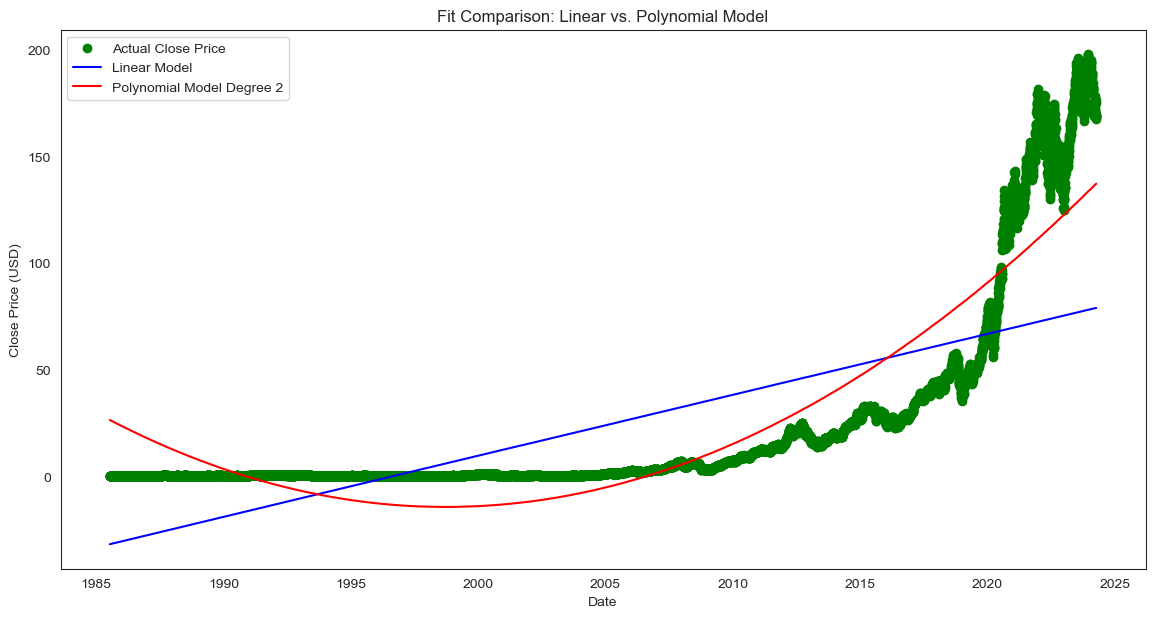

Mean Squared Error (Linear Model): 1060.25
Mean Squared Error (Polynomial Model): 379.33
R-squared (Linear Model): 0.49
R-squared (Polynomial Model): 0.82


In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])

# Create a time index for regression
data['Time_Index'] = np.arange(len(data))

# Setting up the data for modeling
x = data['Time_Index'].values.reshape(-1, 1)
y = data['Close'].values.reshape(-1, 1)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred_linear = linear_regressor.predict(x)

# Polynomial Regression - Degree 2
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

polynomial_regressor = LinearRegression()
polynomial_regressor.fit(x_poly, y)
y_pred_poly = polynomial_regressor.predict(x_poly)

# Calculating metrics
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(data['Date'], y, color='green', label='Actual Close Price')
plt.plot(data['Date'], y_pred_linear, label='Linear Model', color='blue')
plt.plot(data['Date'], y_pred_poly, label='Polynomial Model Degree 2', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Fit Comparison: Linear vs. Polynomial Model')
plt.show()

# Displaying the results
print("Mean Squared Error (Linear Model): {:.2f}".format(mse_linear))
print("Mean Squared Error (Polynomial Model): {:.2f}".format(mse_poly))
print("R-squared (Linear Model): {:.2f}".format(r2_linear))
print("R-squared (Polynomial Model): {:.2f}".format(r2_poly))



- **Linear Model**:
  - MSE: 1060.25
  - R-squared: 0.49

- **Polynomial Model**:
  - MSE: 379.33
  - R-squared: 0.82

The polynomial model outperforms the linear model in both metrics. It has a significantly lower MSE and a higher R-squared value, indicating that it provides a better fit to the data and explains more of the variability compared to the linear model. This suggests that the polynomial model is likely a better choice for modeling your data.

## Data Stationarity check

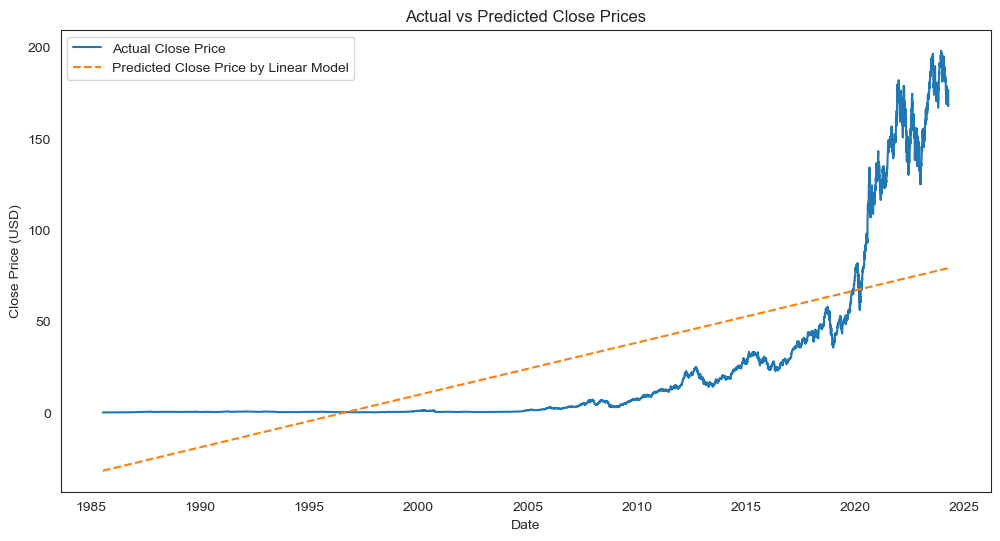

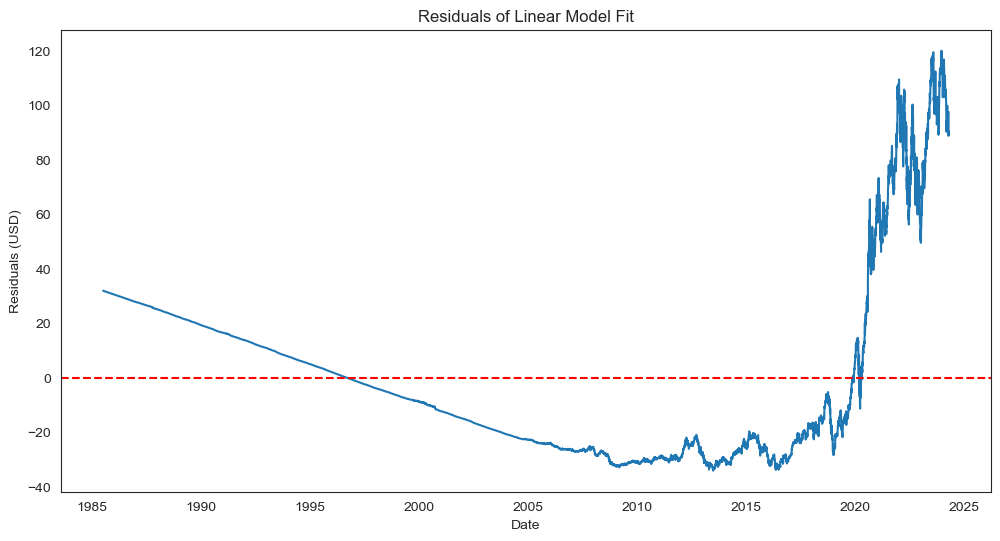

ADF Statistic: 2.090429
p-value: 0.998780
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Data is non-stationary


In [74]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data['Date'] = pd.to_datetime(data['Date'])
data['Time_Index'] = np.arange(len(data))  # Create a time index for regression

# Linear Regression to check for non-linearity
model = LinearRegression()
model.fit(data[['Time_Index']], data['Close'])
data['Predicted'] = model.predict(data[['Time_Index']])

# Plotting actual vs. predicted prices to check for non-linearity
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(data['Date'], data['Predicted'], label='Predicted Close Price by Linear Model', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Residual plot
data['Residuals'] = data['Close'] - data['Predicted']
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Residuals'])
plt.title('Residuals of Linear Model Fit')
plt.xlabel('Date')
plt.ylabel('Residuals (USD)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Augmented Dickey-Fuller Test to check for stationarity
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation of ADF Test
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")


## seasonality decomposition

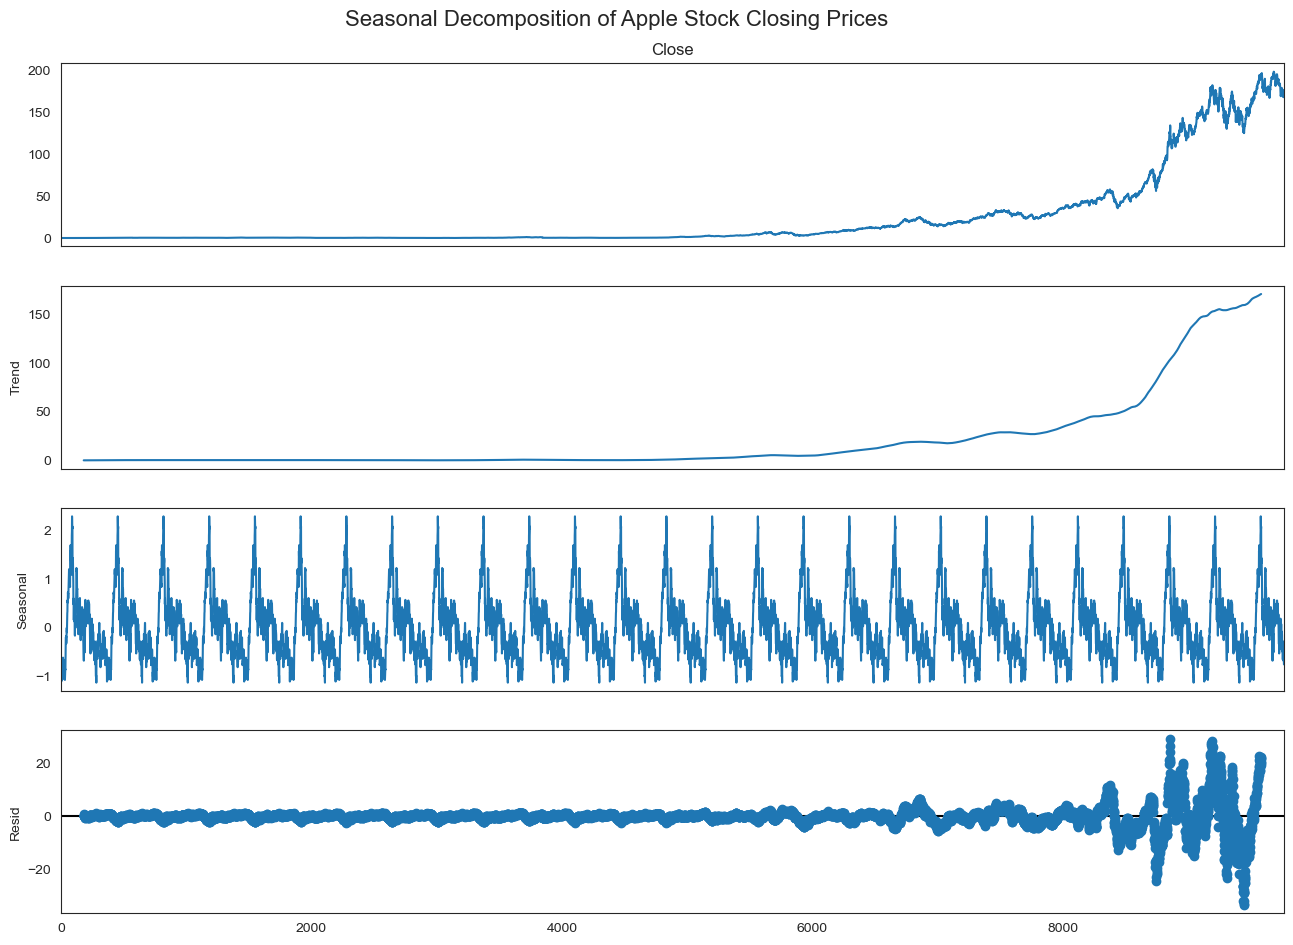

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series to identify seasonal patterns
decomposition = seasonal_decompose(apple_stock_data['Close'], model='additive', period=365)  # 252 trading days in a year

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Seasonal Decomposition of Apple Stock Closing Prices', fontsize=16)
plt.show()


# Model Building
Models Implemented :





1.   LSTM with XGBOOST & VOTING REGRESSOR
2.   LSTM with lagged features & hyper parameter tuning
3.   LSTM with TRANSFER LEARNING
4.   PROPHET
5.   LSTM without lagged features
5.   ARIMA & SARIMA





In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

df=pd.read_csv("AAPL.csv")

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)


# Calculate new features
df['Daily Range'] = df['High'] - df['Low']  # Daily price range
df['Price Change'] = df['Close'].diff()  # Change in close price from the previous day
df['Moving Average (20)'] = df['Close'].rolling(window=20).mean()  # 20-day moving average

# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Fill the first NaN in Price Change with 0 or the first valid difference
df['Price Change'].fillna(0, inplace=True)  # Fill with 0


from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Initialize the correct scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale stock prices and derived features
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Daily Range', 'Price Change', 'Moving Average (20)']
df[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

# Standardize volume
df['Volume'] = standard_scaler.fit_transform(df[['Volume']])


# Initialize Min-Max scaler and Standard scaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale stock prices and derived features
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Daily Range', 'Price Change', 'Moving Average (20)']
df[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

# Standardize volume
df['Volume'] = standard_scaler.fit_transform(df[['Volume']])


df.drop(columns=['Moving Average (20)'], inplace=True)



import pandas as pd

# Define the number of lagged time steps
lag_steps = 3  # Example: Create lagged features for the previous 3 time steps

# Create lagged features for the 'Close' price
for i in range(1, lag_steps + 1):
    df[f'Close_lag_{i}'] = df['Close'].shift(i)

# Drop rows with NaN values (due to shifting)
df.dropna(inplace=True)


## BASIC LSTM, XGB WITH ENSEMBLE VOTING REGRESSOR

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random


# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



# Train-validation-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop(columns=['Close']), df['Close'], test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

# Define LSTM model architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_data=(X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1), y_val))

# Evaluate the model
mse_lstm = model.evaluate(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print("Test MSE (LSTM):", mse_lstm)

# Initialize XGBoost model
xgb_model = XGBRegressor()

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, xgb_model.predict(X_test))
print("Test MSE (XGBoost):", mse_xgb)

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        X = np.expand_dims(X, axis=-1)
        self.model.fit(X, y, epochs=50, batch_size=32)
        return self

    def predict(self, X):
        X = np.expand_dims(X, axis=-1)
        return self.model.predict(X).reshape(-1)

# Initialize voting regressor with LSTM and XGBoost
voting_regressor = VotingRegressor(estimators=[
    ('lstm', KerasRegressorWrapper(model)),
    ('xgb', xgb_model)
])


Epoch 1/50
183/183 [==============================] - 6s 15ms/step - loss: 1.7657e-05 - val_loss: 0.0044
Epoch 2/50
183/183 [==============================] - 2s 9ms/step - loss: 1.0115e-05 - val_loss: 0.0021
Epoch 3/50
183/183 [==============================] - 2s 9ms/step - loss: 9.0946e-06 - val_loss: 0.0040
Epoch 4/50
183/183 [==============================] - 2s 12ms/step - loss: 5.5876e-06 - val_loss: 0.0047
Epoch 5/50
183/183 [==============================] - 2s 13ms/step - loss: 5.4875e-06 - val_loss: 0.0048
Epoch 6/50
183/183 [==============================] - 2s 12ms/step - loss: 3.8983e-06 - val_loss: 0.0034
Epoch 7/50
183/183 [==============================] - 2s 12ms/step - loss: 3.5326e-06 - val_loss: 0.0041
Epoch 8/50
183/183 [==============================] - 2s 12ms/step - loss: 2.9831e-06 - val_loss: 0.0034
Epoch 9/50
183/183 [==============================] - 2s 13ms/step - loss: 2.7545e-06 - val_loss: 0.0041
Epoch 10/50
183/183 [==============================] - 2s

The model employs a combined approach for time series forecasting, particularly designed for stock market analysis. It includes an LSTM neural network to capture temporal patterns and an XGBoost regressor for feature-based predictions. Lagged features from previous time steps help enrich the dataset, allowing for more accurate forecasting.

The architecture includes:

LSTM Model: A Sequential model comprising three LSTM layers, each with 50 units, and a Dense layer for output. This model captures time-dependent relationships.
XGBoost Regressor: A gradient boosting algorithm that provides robust predictions based on non-linear features.
Voting Regressor: An ensemble technique that combines the LSTM and XGBoost models via weighted voting, improving the predictive accuracy by aggregating their forecasts.
The model's training includes Min-Max scaling for stock prices and standardization for volume, followed by a train-validation-test split for evaluation. Performance is measured using Mean Squared Error (MSE) to ensure precise forecasting.

## LSTM WITH Lagged features and Hyper-Parameter tuning

In [82]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import tensorflow as tf
import random


# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Function to reshape data for LSTM input
def reshape_lstm_input(data):
    return data.values.reshape(data.shape[0], data.shape[1], 1)

# Train-validation-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df.drop(columns=['Close']), df['Close'], test_size=0.2, shuffle=False
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, shuffle=False
)

# Define LSTM model architecture
def create_lstm_model(units=50, dropout=0.2):
    model = Sequential([
        LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], 1)),
        Dropout(dropout),
        Dense(1)  # Output one value
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Custom hyperparameter tuning
param_grid_lstm = {
    'units': [50, 100, 150],
    'dropout': [0.2, 0.3, 0.4]
}

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

best_mse = np.inf
best_params = {}
best_model = None

# Manual hyperparameter tuning with more epochs and early stopping
for units in param_grid_lstm['units']:
    for dropout in param_grid_lstm['dropout']:
        model = create_lstm_model(units=units, dropout=dropout)
        model.fit(
            reshape_lstm_input(X_train),
            y_train,
            epochs=20,
            batch_size=32,
            verbose=0,
            validation_data=(reshape_lstm_input(X_val), y_val),
            callbacks=[early_stopping]
        )

        predictions = model.predict(reshape_lstm_input(X_val))
        mse = mean_squared_error(y_val, predictions)

        if mse < best_mse:
            best_mse = mse
            best_params = {'units': units, 'dropout': dropout}
            best_model = model



# Predictions from individual models with reshaping
lstm_predictions = best_model.predict(reshape_lstm_input(X_test)).reshape(-1, 1)




# Reshape y_test to ensure proper shape
y_test = y_test.values.reshape(-1, 1)


# Calculate MSE for each model
mse_lstm = mean_squared_error(y_test, lstm_predictions)


print("Test MSE (LSTM):", mse_lstm)

62/62 [==============================] - 0s 4ms/step
Test MSE (LSTM): 0.2036747476335048


This time series forecasting model leverages an LSTM neural network to predict stock prices, with a particular focus on hyperparameter tuning to improve its predictive accuracy.

Features:
LSTM Architecture: The model consists of a single LSTM layer followed by a Dropout layer and a Dense output layer, designed to capture temporal patterns in stock data.
Lagged Features: To enhance forecasting accuracy, lagged features for the 'Close' price are added, providing context from previous time steps.
Scaling: Stock prices are scaled using Min-Max scaling, while volume is standardized for consistency.
Hyperparameter Tuning:
Parameters: The model undergoes manual hyperparameter tuning, experimenting with different values for LSTM units (50, 100, 150) and dropout rates (0.2, 0.3, 0.4).
Early Stopping: The training process includes an early stopping mechanism, monitoring validation loss and stopping if no improvement is seen after 3 epochs.
Results: By tuning these parameters and applying early stopping, the model's Mean Squared Error (MSE) on test data is minimized, demonstrating improved forecasting accuracy.
This approach illustrates the importance of hyperparameter tuning and early stopping in reducing error and achieving better performance in time series forecasting tasks.

# Time Series Forecasting Using PROPHET, LSTM & ARIMA

## PROPHET MODEL

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/f8/8f/9cff125e50b56e29e7e05776dc74e56fc70b79830f0b85e947e5be831e96/holidays-0.67-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://fi

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


03:24:50 - cmdstanpy - INFO - Chain [1] start processing
03:25:04 - cmdstanpy - INFO - Chain [1] done processing


Test MAE: 0.1773599991634368
Test MSE: 0.04445646309098826
Test RMSE: 0.21084701347419713


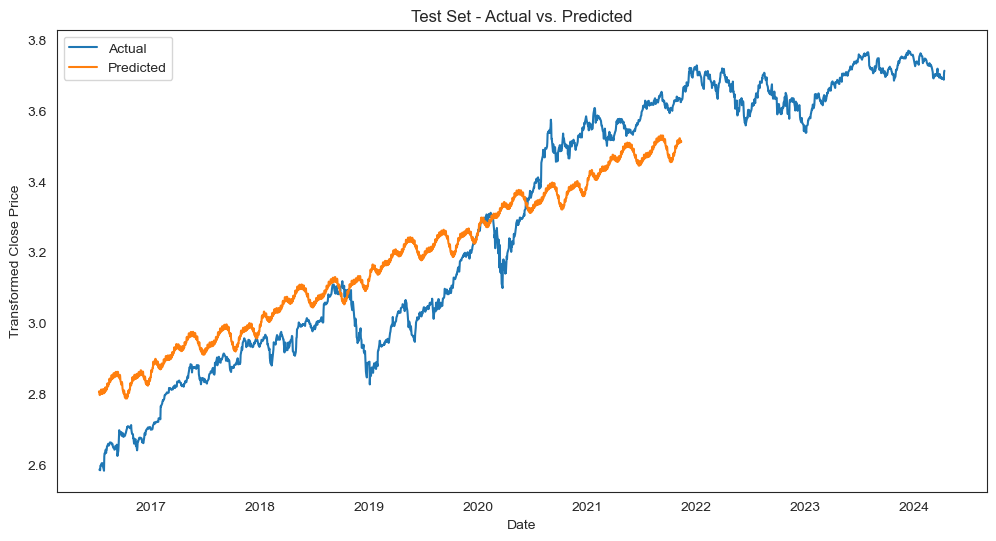

In [85]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np
import tensorflow as tf
import random

# Load the dataset
data_path = "AAPL.csv"
df = pd.read_csv(data_path, index_col='Date', parse_dates=True)

# Apply data cleaning and preprocessing
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Apply Box-Cox transformation to stabilize variance
df['Close'], _ = boxcox(df['Close'])  # Apply Box-Cox transformation
# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Prophet requires specific format with 'ds' (date) and 'y' (target variable)
prophet_df = df[['Close']].reset_index()
prophet_df.columns = ['ds', 'y']

# Train-test split
train_df, test_df = train_test_split(prophet_df, test_size=0.2, shuffle=False)

# Initialize and fit Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,  # Lower value for smoother trend changes
    seasonality_prior_scale=10,  # Higher value for stronger seasonalities
    interval_width=0.95,  # Narrowing prediction intervals
)

# Add additional regressors for capturing trends
train_df['max'] = train_df['y'].max()  # Set upper bound for trends
train_df['min'] = train_df['y'].min()  # Set lower bound for trends
model.add_regressor('max')
model.add_regressor('min')

# Fit the model
model.fit(train_df)

# Make forecast on test set
future = model.make_future_dataframe(periods=len(test_df), freq='D')
future['max'] = train_df['y'].max()  # Set upper bound for future data
future['min'] = train_df['y'].min()  # Set lower bound for future data
forecast = model.predict(future)

# Extract forecasted values corresponding to the test set
test_forecast = forecast.tail(len(test_df))

# Calculate error metrics
mae_test = mean_absolute_error(test_df['y'], test_forecast['yhat'])
mse_test = mean_squared_error(test_df['y'], test_forecast['yhat'])
rmse_test = np.sqrt(mse_test)

print("Test MAE:", mae_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)

# Plot actual vs. predicted on the test set
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Transformed Close Price')
plt.title('Test Set - Actual vs. Predicted')
plt.legend()
plt.show()


This model applies a combination of data preprocessing and forecasting techniques for stock price prediction using the Prophet library. The primary features include:

Data Preprocessing:
Box-Cox Transformation: The Close prices undergo a Box-Cox transformation to stabilize variance, which helps improve the model's fit and predictive accuracy.
Data Cleaning: The dataset is cleaned by replacing infinite values with NaN and removing missing data points.
Prophet Model:
Initialization: The model is initialized with custom parameters, including yearly and weekly seasonalities, a lower changepoint prior scale for smoother trends, and a higher seasonality prior scale to capture stronger seasonalities.
Regressors: Two additional regressors, 'max' and 'min', are added to capture upper and lower trend bounds.
Prediction: The model is fit on the training data, and forecasts are made on the test set, providing predictions alongside actual values.

This approach demonstrates how careful data preprocessing and specialized forecasting methods can enhance predictive accuracy, making it a valuable tool for financial forecasting.

## PROPHET YEAR SEGMENTATION GRAPH FOR 2023

03:26:29 - cmdstanpy - INFO - Chain [1] start processing
03:26:29 - cmdstanpy - INFO - Chain [1] done processing


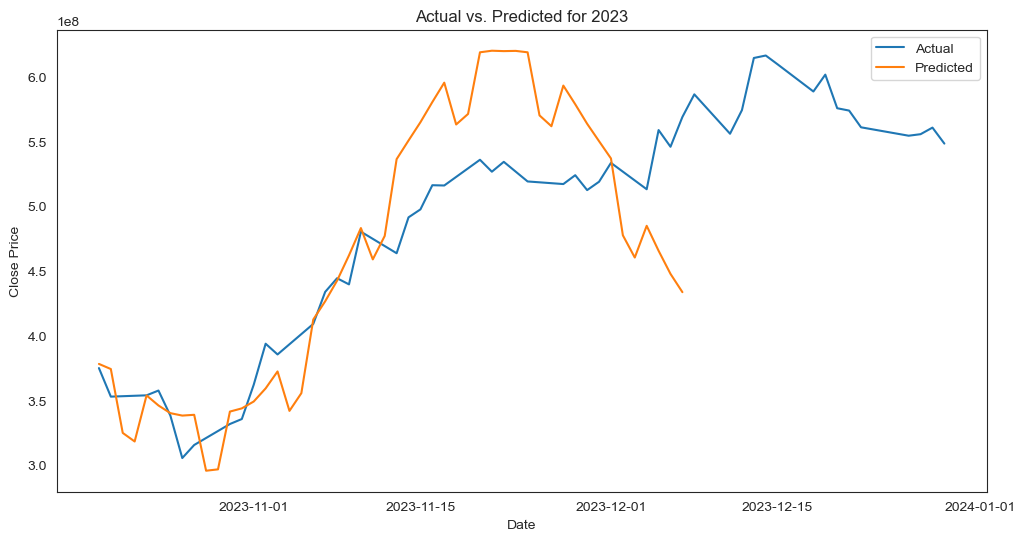

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import boxcox
import numpy as np
import tensorflow as tf
import random

# Load the dataset
data_path = "AAPL.csv"
df = pd.read_csv(data_path, index_col='Date', parse_dates=True)

# Apply data cleaning and preprocessing
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Extract the year from the index
df['Year'] = df.index.year

# Filter data for 2023
yearly_df = df[df['Year'] == 2023]

# Reset index and create a Prophet dataframe
prophet_df = yearly_df[['Close']].reset_index()
prophet_df.columns = ['ds', 'y']

# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Apply Box-Cox transformation to stabilize variance
prophet_df['y'], _ = boxcox(prophet_df['y'])

# Train-test split
train_df, test_df = train_test_split(prophet_df, test_size=0.2, shuffle=False)

# Initialize and fit Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,  # Smoother trend changes
    seasonality_prior_scale=10,  # Stronger seasonalities
    interval_width=0.95  # Narrower prediction intervals
)

# Fit the model on the training data
model.fit(train_df)

# Make forecast on the test set
future = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = model.predict(future)

# Extract forecasted values corresponding to the test set
test_forecast = forecast.tail(len(test_df))

# Plot actual vs. predicted for 2023
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted for 2023')
plt.legend()
plt.show()

This model applies a year-based segmentation approach for time series forecasting, specifically focusing on 2023. The key features include:
Yearly Filtering: The dataset is filtered to include only data from 2023, creating a specific yearly subset for model training.
Initialization: The model is initialized with custom parameters, including yearly and weekly seasonalities, a lower changepoint prior scale for smoother trend changes, and a higher seasonality prior scale to capture stronger seasonalities.
Training: The model is fit on the 2023 training data, followed by forecasting on the test set, providing predictions alongside actual values.

Intent:
Year Segmentation: This code demonstrates a year segmentation strategy, allowing the model to specialize in specific yearly trends and seasonal patterns. This strategy helps capture yearly changes more accurately, providing a focused view of time series forecasting for financial datasets.

This approach highlights the benefits of segmenting time series data by year, allowing for more specialized and accurate forecasting of stock market trends.

## LSTM WITHOUT LAGGED FEATURES

Epoch 1/20
270/270 [==============================] - 10s 32ms/step - loss: 8.3288e-05
Epoch 2/20
270/270 [==============================] - 12s 44ms/step - loss: 7.0355e-06
Epoch 3/20
270/270 [==============================] - 12s 44ms/step - loss: 5.9408e-06
Epoch 4/20
270/270 [==============================] - 12s 46ms/step - loss: 7.7484e-06
Epoch 5/20
270/270 [==============================] - 12s 45ms/step - loss: 7.6284e-06
Epoch 6/20
270/270 [==============================] - 12s 44ms/step - loss: 6.2207e-06
Epoch 7/20
270/270 [==============================] - 12s 44ms/step - loss: 5.4259e-06
Epoch 8/20
270/270 [==============================] - 12s 45ms/step - loss: 5.0323e-06
Epoch 9/20
270/270 [==============================] - 12s 45ms/step - loss: 5.5210e-06
Epoch 10/20
270/270 [==============================] - 12s 45ms/step - loss: 6.9328e-06
Epoch 11/20
270/270 [==============================] - 12s 44ms/step - loss: 5.7573e-06
Epoch 12/20
270/270 [====================

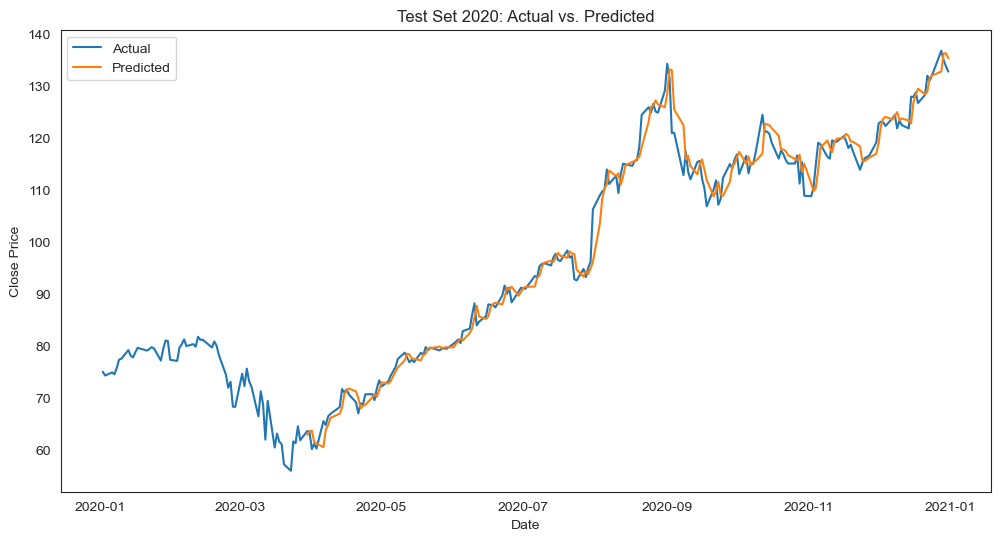

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
import random

# Load the dataset
data_path ="AAPL.csv"
df = pd.read_csv(data_path, index_col='Date', parse_dates=True)


# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Data cleaning and preprocessing
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Apply MinMax scaling to normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Define the train-test split for the specified year range
WINDOW_SIZE = 60  # Adjust window size for LSTM sequences
train_set_scaled = df_scaled[df.index.year < 2020]  # Training set before 2020
test_set_scaled = df_scaled[df.index.year == 2020]  # Test set for 2020

# Function to generate sequences for LSTM
def generate_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Create training and test data
X_train, y_train = generate_data(train_set_scaled, WINDOW_SIZE)
X_test, y_test = generate_data(test_set_scaled, WINDOW_SIZE)

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(WINDOW_SIZE, 1)),  # LSTM layer
    Dense(64),  # Intermediate dense layer
    Dense(32),  # Smaller dense layer
    Dense(1)  # Output layer
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions on the test set (2020)
price_prediction_test = model.predict(X_test)

# Inverse transform predictions to get actual price values
price_prediction_test_inverse = scaler.inverse_transform(price_prediction_test)

# Calculate error metrics for the test set
price_error = mean_squared_error(y_test, price_prediction_test)
print("Price error on the test set:", price_error)

# Plot actual vs. predicted for the test set (2020)
plt.figure(figsize=(12, 6))
plt.plot(df.index[df.index.year == 2020], df['Close'][df.index.year == 2020], label='Actual')  # Actual data for 2020
plt.plot(df.index[df.index.year == 2020][WINDOW_SIZE:], price_prediction_test_inverse, label='Predicted')  # Predicted data
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Test Set 2020: Actual vs. Predicted')
plt.legend()
plt.show()

## ARIMA

In [89]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from itertools import product
import numpy as np
import tensorflow as tf
import random


data = pd.read_csv("AAPL.csv")
prices = data['Close']


# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



# Check for stationarity
result = adfuller(prices)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Define p, d, q ranges
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# Generate all different combinations of p, d, q triplets
pdq = list(product(p, d, q))

# Search for the best ARIMA parameters
best_aic = float("inf")
best_pdq = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(prices, order=param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print('Best ARIMA%s AIC=%.2f' % (best_pdq, best_aic))


ADF Statistic: 2.090429
p-value: 0.998780


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\Lib\s

Best ARIMA(2, 1, 2) AIC=25709.35


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



This model employs an ARIMA (AutoRegressive Integrated Moving Average) model for time series forecasting, specifically for stock price predictions.

Data Preparation:
Data Loading: The dataset is loaded from a CSV file, focusing on the 'Close' prices for time series analysis.
Stationarity Check: The Augmented Dickey-Fuller (ADF) test is applied to check for stationarity in the 'Close' prices, providing an ADF Statistic and p-value to determine if differencing (integration) is necessary.
Model Building:
ARIMA Parameters: The model explores combinations of p, d, and q values, representing the autoregressive, differencing, and moving average terms respectively.
Parameter Search: An exhaustive search is performed through all possible (p, d, q) combinations, fitting an ARIMA model for each and evaluating its performance using the Akaike Information Criterion (AIC).
Best Model Selection: The model with the lowest AIC is selected as the best-performing ARIMA model, indicating the optimal balance between model complexity and goodness of fit.

This approach highlights the ARIMA model's capacity for time series forecasting, showcasing its flexibility in exploring different parameter combinations and selecting the best-performing model for accurate predictions.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters

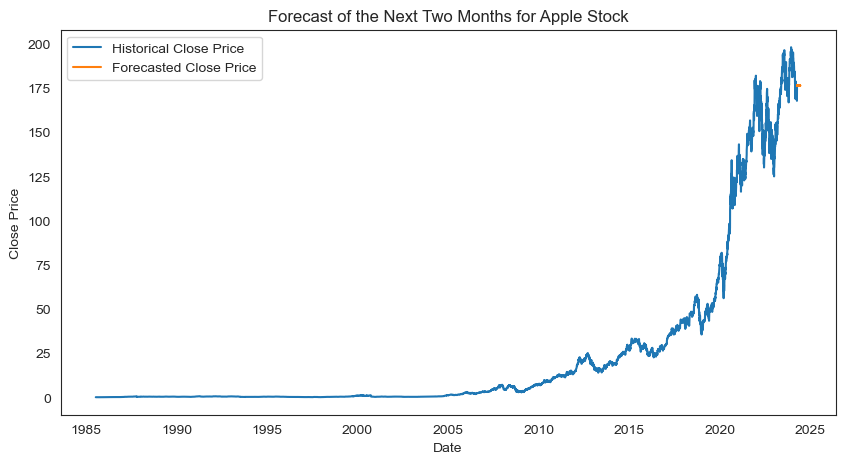

In [90]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import random


data = pd.read_csv("AAPL.csv")


# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Ensure data is sorted by date
data.sort_index(inplace=True)

prices = data['Close']

# Fit ARIMA(2, 1, 2)
model = ARIMA(prices, order=(2, 1, 2))
model_fit = model.fit()

# Forecast next 66 days
forecast_steps = 66
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates for plotting
future_dates = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(prices, label='Historical Close Price')
plt.plot(future_dates, forecast, label='Forecasted Close Price')
plt.title('Forecast of the Next Two Months for Apple Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is ava

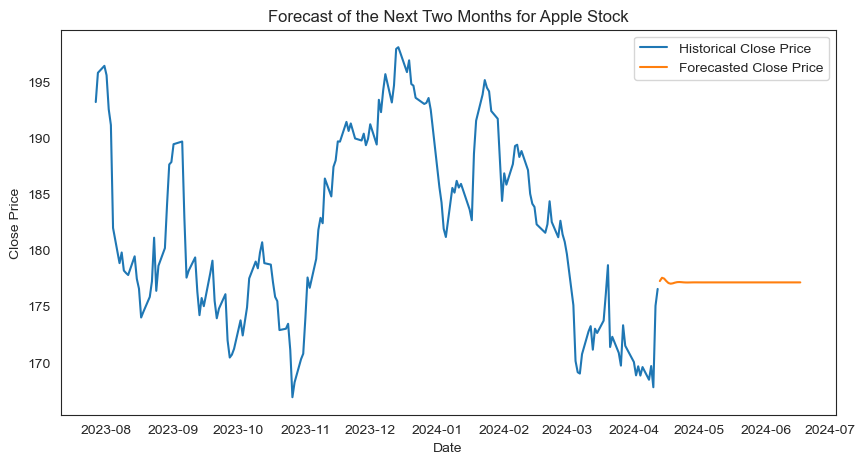

In [91]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random


data = pd.read_csv("AAPL.csv")


data['Date'] = pd.to_datetime(data['Date'])


# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Ensure data is sorted by date
data.sort_index(inplace=True)

# Use only the last few months of data for forecasting
historical_data = data['Close'].iloc[-180:]  # Adjust the number of months as needed

# Fit ARIMA(2, 1, 2)
model = ARIMA(historical_data, order=(2, 1, 2))
model_fit = model.fit()

# Forecast next 66 days
forecast_steps = 66
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates for plotting
future_dates = pd.date_range(start=historical_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(historical_data, label='Historical Close Price')
plt.plot(future_dates, forecast, label='Forecasted Close Price')
plt.title('Forecast of the Next Two Months for Apple Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


This model utilizes an ARIMA (AutoRegressive Integrated Moving Average) model for time series forecasting, specifically to predict Apple stock prices for the next two months.

Data Sorting: The dataset is sorted by date to maintain chronological order, ensuring consistency for modeling and forecasting.
ARIMA Model:
Model Fitting: An ARIMA(2, 1, 2) model is defined and fitted on the historical 'Close' prices, capturing autoregressive, differencing, and moving average components to model time series patterns effectively.
Forecasting: The model forecasts the next 66 days, generating future prices based on past trends.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



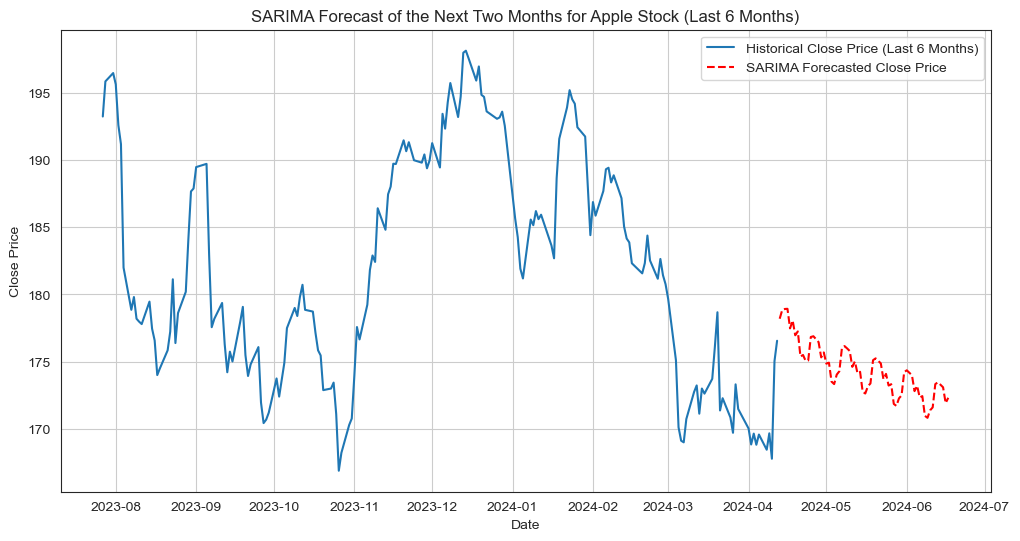

In [92]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
import random


data = pd.read_csv("AAPL.csv")


data['Date'] = pd.to_datetime(data['Date'])


data.set_index('Date', inplace=True)

# Setting a global seed for numpy, Python's random module, and TensorFlow
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Ensure data is sorted by date
data.sort_index(inplace=True)

# Use only the last 6 months of data for visualization
last_6_months_data = data['Close'].iloc[-180:]

# Fit SARIMA(2, 1, 2)x(1, 1, 1, 12)
sarima_model = SARIMAX(last_6_months_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Forecast next 66 days
sarima_forecast = sarima_model_fit.forecast(steps=66)

# Create future dates for plotting
future_dates = pd.date_range(start=last_6_months_data.index[-1] + pd.Timedelta(days=1), periods=66, freq='D')

# Plot SARIMA forecast for the last 6 months
plt.figure(figsize=(12, 6))
plt.plot(last_6_months_data, label='Historical Close Price (Last 6 Months)')
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecasted Close Price', linestyle='--', color='red')
plt.title('SARIMA Forecast of the Next Two Months for Apple Stock (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(last_6_months_data[-66:], sarima_forecast)


This model applies a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model for time series forecasting, specifically to predict Apple stock prices over the next two months, based on recent historical data.
Data Filtering: The dataset is filtered to include the last 6 months of 'Close' prices, creating a recent, focused dataset for modeling and forecasting.

SARIMA Model:
Model Fitting: A SARIMA model with order (2, 1, 2) and seasonal order (1, 1, 1, 12) is defined and fitted on the recent historical data, capturing both autoregressive and seasonal components effectively.
Forecasting: The model forecasts the next 66 days, generating future prices based on past trends.

This approach highlights the SARIMA model's capacity for time series forecasting, showing its ability to capture both seasonal and non-seasonal patterns, making it a valuable tool for financial forecasting.